<a href="https://colab.research.google.com/github/shayanAbbasi1995/Non-financial-misconduct-and-Market-reaction/blob/main/Master_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Data Work***

## Import Data

THIS PART SHOULD BE RUNNED ONLY ONCE.

In [ ]:
# Run this if running in Google Collab
# Mount google drive if running from Google Collab
from google.colab import drive
drive.mount('/content/drive')

# Set current directory if running from Google Collab

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/SP500')# here use your path to current notebook

Mounted at /content/drive


In [ ]:
import pandas as pd
# SP500 data
chng_SPX=pd.read_excel('./Changes in S&P500.xlsx') # this is a relative path from current folder to the folder where you have the dataset
present_SPX=pd.read_excel('./S&P500 present constituents.xlsx')


In [ ]:
chng_SPX.columns = ['date', 'tick_added', 'added_sec_name', 'tick_removed', 'removed_sec_name', 'reason']
chng_SPX = chng_SPX[1:]
chng_SPX

,date,tick_added,added_sec_name,tick_removed,removed_sec_name,reason
1,2021-03-22,NXPI,NXP Semiconductors,FLS,Flowserve,Market capitalization change.[6]
2,2021-03-22,PENN,Penn National Gaming,SLG,SL Green Realty,Market capitalization change.[6]
3,2021-03-22,GNRC,Generac Holdings,XRX,Xerox,Market capitalization change.[6]
4,2021-03-22,CZR,Caesars Entertainment,VNT,Vontier,Market capitalization change.[6]
5,2021-02-12,MPWR,Monolithic Power Systems,FTI,TechnipFMC,TechnipFMC was removed from the S&P 500 in ant...
...,...,...,...,...,...,...
267,2000-12-05,SBL,Symbol Technologies,OI,Owens-Illinois,Market Cap changes.
268,2000-12-05,AYE,Allegheny Energy,GRA,W.R. Grace,Market Cap changes.
269,2000-12-05,ABK,Ambac Financial,CCK,Crown Holdings,Market Cap changes.
270,2000-07-27,JDSU,JDS Uniphase,RAD,RiteAid,Market Cap change.[210]


In [ ]:
present_SPX.columns=['tick', 'sec_name', 'sec_filing', 'GICS_sector', 'GICS_sub', 'HQ_location', 'date_first_added', 'CIK', 'founded','','','','']
present_SPX = present_SPX[0:]
present_SPX.drop(present_SPX.columns[[9,10,11,12]], axis = 1, inplace = True)
present_SPX

,tick,sec_name,sec_filing,GICS_sector,GICS_sub,HQ_location,date_first_added,CIK,founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09 00:00:00,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31 00:00:00,1800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31 00:00:00,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31 00:00:00,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06 00:00:00,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06 00:00:00,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23 00:00:00,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07 00:00:00,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22 00:00:00,109380,1873


In [ ]:
# NFF and Ticker list
NFF=pd.read_excel('../Master Project/Violation Tracker 2017-2020 Full Data.xlsx') # this is a relative path from current folder to the folder where you have the dataset
Ticker_lst=pd.read_excel('../Master Project/Ticker_List.xlsx')

In [ ]:
len(NFF)

86677

In [ ]:
NFF.drop_duplicates()

,agency,agency_code,pen_year,company,city,county,street_address,state,zip,description,naics,info_source,notes,unique_id,parent_name,load_day,penalty,sub_penalty,penalty_adjusted,orig_id,civil_criminal,npa_dpa,offense_group,primary_offense,secondary_offense,naics_tr,case_id,facility_name,penalty_date,govt_level,case_category,court,litigation_case_title,lawsuit_resolution,pacer_link
0,Mine Safety and Health Administration,MSHA,2020,Northshore Mining Company,Silver Bay,NaN,NaN,MN,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644887,Cleveland-Cliffs,20200615,6257,0,6257,9381567,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9381567,Northshore Mining Company,20200122,federal,agency action,NaN,NaN,NaN,NaN
1,Mine Safety and Health Administration,MSHA,2020,Panther Creek Mining LLC,Drybranch,NaN,NaN,WV,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644885,NaN,20200615,7955,0,7955,9244469,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9244469,American Eagle Mine,20200206,federal,agency action,NaN,NaN,NaN,NaN
2,Mine Safety and Health Administration,MSHA,2020,Consol Pennsylvania Coal Company LLC,Claysville,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644874,Consol Energy,20200615,7341,0,7341,9203445,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9203445,Enlow Fork Mine,20200131,federal,agency action,NaN,NaN,NaN,NaN
3,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644827,Freeport-McMoRan,20200615,7955,0,7955,9393761,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393761,Freeport-McMoRan Morenci Inc.,20200128,federal,agency action,NaN,NaN,NaN,NaN
4,Mine Safety and Health Administration,MSHA,2020,Buzzi Unicem USA,Stockertown,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644822,Buzzi Unicem,20200615,7341,0,7341,9522116,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9522116,Hercules Cement LP,20200213,federal,agency action,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86672,Multistate Financial Regulators Case,MULTI-FIN,2017,Old Republic Insurance Company,NaN,NaN,NaN,NaN,NaN,"Old Republic agreed to pay nearly $300,000 to ...",NaN,https://www.cards.commerce.state.mn.us/CARDS/s...,NaN,3433817,Old Republic International,20200615,298958,0,298958,NaN,civil,NaN,consumer-protection-related offenses,insurance violation,NaN,NaN,NaN,NaN,20170509,state,agency action,NaN,NaN,NaN,NaN
86673,Multistate Financial Regulators Case,MULTI-FIN,2017,QBE Holdings Inc.,NaN,NaN,NaN,NaN,NaN,QBE agreed to pay more than $21 million to a g...,NaN,https://dlr.sd.gov/insurance/market_conduct_mu...,NaN,3433822,QBE Insurance,20200615,21164000,0,21164000,NaN,civil,NaN,consumer-protection-related offenses,insurance violation,NaN,NaN,NaN,NaN,20170801,state,agency action,NaN,NaN,NaN,NaN
86674,Multistate Financial Regulators Case,MULTI-FIN,2017,State Farm Life Insurance Company et al.,NaN,NaN,NaN,NaN,NaN,"State Farm agreed to pay $250,000 to settle mu...",NaN,https://insurance.utah.gov/wp-content/uploads/...,NaN,3433828,State Farm Insurance,20200615,250000,0,250000,NaN,civil,NaN,consumer-protection-related offenses,insurance violation,NaN,NaN,NaN,NaN,20171101,state,agency action,NaN,NaN,NaN,NaN
86675,Multistate Financial Regulators Case,MULTI-FIN,2017,Transamerica Casualty Insurance Company,NaN,NaN,NaN,NaN,NaN,Transamerica agreed to make a $3 million admin...,NaN,https://dlr.sd.gov/insurance/market_conduct_mu...,NaN,3433833,Aegon,20200615,3000000,0,3000000,NaN,civil,NaN,consumer-protection-related offenses,insurance violation,NaN

In [ ]:
Ticker_lst

,stock_ticker,parent_name,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link
0,FLWS,1-800-Flowers.com,38181,4,"CHERYL & CO; FANNIE MAY CONFECTIONS BRANDS, IN...",2935,publicly traded,yes,USA,New York,retail-internet flowers,retailing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1,DDD,3D Systems,176637,4,3D SYS,2574,publicly traded,yes,USA,South Carolina,3-D printers,miscellaneous manufacturing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
2,MMM,3M Company,883252467,84,3M; 3M ATTENTI; 3M AUSTIN CENTER; 3M COLLEGE S...,90,publicly traded,yes,USA,Minnesota,diversified,miscellaneous manufacturing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
3,AHC,A.H. Belo,2500000,1,BELO,1618,publicly traded,NaN,USA,Texas,media,media,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
4,CTAM,A.M. Castle & Co.,951472,11,AM CASTLE; AM CASTLE AND,1978,publicly traded,NaN,USA,Illinois,metals service centers,metals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,https://data.covidstimuluswatch.org/parent/am-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,ZG,Zillow Group,8462888,2,"Zillow, Inc.",1158,publicly traded,yes,USA,Washington,real estate information services,miscellaneous services,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1429,ZBH,Zimmer Biomet,246074182,13,BIOMET; BIOMET FAIR LAWN LP; BIOMET ORTHOPEDIC...,237,publicly traded,yes,USA,Indiana,medical devices,medical equipment and supplies,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1430,ZION,Zions Bancorporation,11615347,3,ZB NA FKA ZIONS FIRST NATIONAL BANK; ZIONS,1035,publicly traded,yes,USA,Utah,banking,financial services,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1431,ZTS,Zoetis,127433,7,ALPHARMA2; FORT DODGE; ZOETIS,2667,publicly traded,yes,USA,New Jersey,animal health products,pharmaceuticals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN


In [ ]:
NFF.columns

Index(['agency', 'agency_code', 'pen_year', 'company', 'city', 'county',
       'street_address', 'state', 'zip', 'description', 'naics', 'info_source',
       'notes', 'unique_id', 'parent_name', 'load_day', 'penalty',
       'sub_penalty', 'penalty_adjusted', 'orig_id', 'civil_criminal',
       'npa_dpa', 'offense_group', 'primary_offense', 'secondary_offense',
       'naics_tr', 'case_id', 'facility_name', 'penalty_date', 'govt_level',
       'case_category', 'court', 'litigation_case_title', 'lawsuit_resolution',
       'pacer_link'],
      dtype='object')

In [ ]:
NFF = NFF[NFF.offense_group != 'financial offenses']

In [ ]:
NFF.agency_code.value_counts()/len(NFF.agency_code)

OSHA          0.548984
WHD           0.119800
FMCSA         0.083735
EPA           0.038951
MSHA          0.037632
                ...   
CA-SCDA       0.000012
NY-WCDA       0.000012
DOJ_NATSEC    0.000012
KY-INS        0.000012
IN-SEC        0.000012
Name: agency_code, Length: 196, dtype: float64

In [ ]:
NFF.shape

(84875, 35)

##DATA Exploration

(84875, 35)


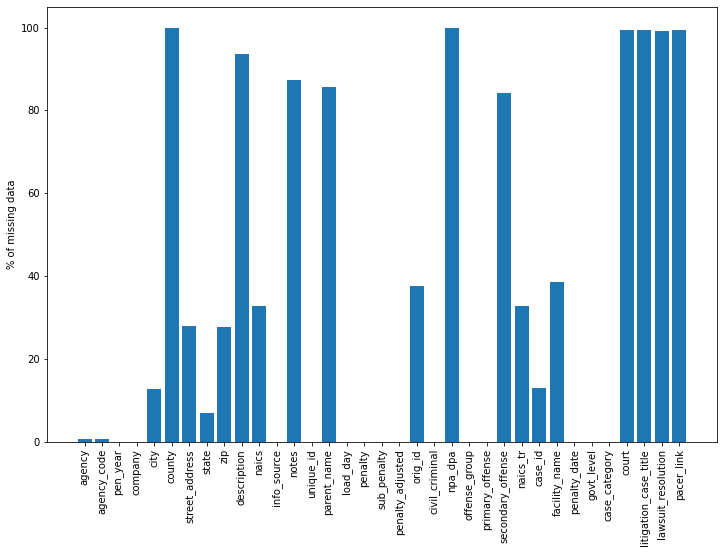

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Missings report
NFF.replace([np.inf, -np.inf], np.nan)
Nulls_NFF = NFF.isnull().sum()
plt.figure(figsize=(12,8))
plt.xticks(rotation="vertical")
plt.bar(Nulls_NFF.index, 100*Nulls_NFF.values/len(NFF.index))
plt.ylabel("% of missing data")
print(NFF.shape)

(1433, 15)


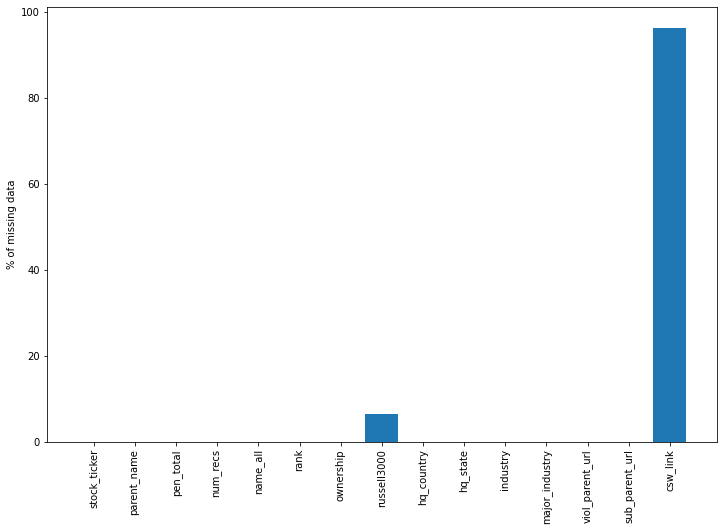

In [ ]:
# Missings report
Ticker_lst.replace([np.inf, -np.inf], np.nan)
Nulls_Ticker_lst = Ticker_lst.isnull().sum()
plt.figure(figsize=(12,8))
plt.xticks(rotation="vertical")
plt.bar(Nulls_Ticker_lst.index, 100*Nulls_Ticker_lst.values/len(Ticker_lst.index))
plt.ylabel("% of missing data")
print(Ticker_lst.shape)

## S&P500 Historical Constituents

SP500 constituents TIME SERIES:

In [ ]:
from datetime import datetime
import numpy as np
import math

today = datetime.today().strftime('%Y-%m-%d')
SP_ts = pd.DataFrame(pd.date_range('2017-01-01', today))
SP_ts.columns = ['date']
constituents = present_SPX.tick.values
SP_ts = SP_ts.iloc[::-1]
SP_ts['constituents']=np.nan
SP_ts.constituents.iloc[0] = [constituents]
for i in range(1,len(SP_ts.date)):
  if SP_ts.date.iloc[i] in chng_SPX.date.values:
    temp = list(SP_ts.constituents.iloc[i-1][0])
    for j in range(len(chng_SPX.date[chng_SPX.date == SP_ts.date.iloc[i]])):
      rem = chng_SPX[chng_SPX.date == SP_ts.date.iloc[i]].tick_removed.iloc[j]
      add = chng_SPX[chng_SPX.date == SP_ts.date.iloc[i]].tick_added.iloc[j]
      #print(add, rem)
      #print(temp)
      if pd.isnull(add): 
        #print('nan in removing')
        pass
      else:
        if add=='GDI':
          add='IR'
        if add=='BMS':
          add='AMCR'
        if add=='Q' or add=='QTRN':
          add='IQV'
        if add=='ARNC':
          add='HWM'
        if add=='KORS':
          add='CPRI'
        if add=='DLPH':
          add='APTV'
        if add=='IR':
          add='TT'
          #print("TT" in temp)
        
        temp.remove(add)
      if pd.isnull(rem):
        #print('nan in adding')
        pass
      else:
        temp.append(rem)
    SP_ts.constituents.iloc[i] = [temp]
  else:
    SP_ts.constituents.iloc[i] = SP_ts.constituents.iloc[i-1]



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
SP_ts


,date,constituents
1603,2021-05-23,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
1602,2021-05-22,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
1601,2021-05-21,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
1600,2021-05-20,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
1599,2021-05-19,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
...,...,...
4,2017-01-05,"[[MMM, ABT, ABBV, ACN, ATVI, ADBE, AAP, AES, A..."
3,2017-01-04,"[[MMM, ABT, ABBV, ACN, ATVI, ADBE, AAP, AES, A..."
2,2017-01-03,"[[MMM, ABT, ABBV, ACN, ATVI, ADBE, AAP, AES, A..."
1,2017-01-02,"[[MMM, ABT, ABBV, ACN, ATVI, ADBE, AAP, AES, A..."


##Adding ticker symbols to dataset

Exploding (Unnest) Ticker data:

In [ ]:
Ticker_lst.columns

Index(['stock_ticker', 'parent_name', 'pen_total', 'num_recs', 'name_all',
       'rank', 'ownership', 'russell3000', 'hq_country', 'hq_state',
       'industry', 'major_industry', 'viol_parent_url', 'sub_parent_url',
       'csw_link'],
      dtype='object')

In [ ]:
#Change names to list format:
for i in range(len(Ticker_lst.name_all)):
  Ticker_lst.name_all[i]=Ticker_lst.name_all[i].split(';')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Ticker_unnest = Ticker_lst.explode('name_all')
Ticker_unnest

,stock_ticker,parent_name,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link
0,FLWS,1-800-Flowers.com,38181,4,CHERYL & CO,2935,publicly traded,yes,USA,New York,retail-internet flowers,retailing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
0,FLWS,1-800-Flowers.com,38181,4,"FANNIE MAY CONFECTIONS BRANDS, INC.",2935,publicly traded,yes,USA,New York,retail-internet flowers,retailing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
0,FLWS,1-800-Flowers.com,38181,4,HARRY LONDON CANDIES,2935,publicly traded,yes,USA,New York,retail-internet flowers,retailing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1,DDD,3D Systems,176637,4,3D SYS,2574,publicly traded,yes,USA,South Carolina,3-D printers,miscellaneous manufacturing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
2,MMM,3M Company,883252467,84,3M,90,publicly traded,yes,USA,Minnesota,diversified,miscellaneous manufacturing,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,ZION,Zions Bancorporation,11615347,3,ZIONS,1035,publicly traded,yes,USA,Utah,banking,financial services,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1431,ZTS,Zoetis,127433,7,ALPHARMA2,2667,publicly traded,yes,USA,New Jersey,animal health products,pharmaceuticals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1431,ZTS,Zoetis,127433,7,FORT DODGE,2667,publicly traded,yes,USA,New Jersey,animal health products,pharmaceuticals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1431,ZTS,Zoetis,127433,7,ZOETIS,2667,publicly traded,yes,USA,New Jersey,animal health products,pharmaceuticals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN


In [ ]:
NFF_merged1 = pd.merge(NFF, Ticker_unnest, left_on='company', right_on='name_all', how='left')
NFF_merged2 = pd.merge(NFF, Ticker_lst, on='parent_name', how='left')
NFF_merged3 = pd.merge(NFF, Ticker_unnest, left_on='company', right_on='parent_name', how='left')


In [ ]:
print(NFF_merged1.stock_ticker.isnull().value_counts())
print(NFF_merged2.stock_ticker.isnull().value_counts())
print(NFF_merged3.stock_ticker.isnull().value_counts())

True     84680
False      195
Name: stock_ticker, dtype: int64
True     78397
False     6478
Name: stock_ticker, dtype: int64
True     84680
False     3508
Name: stock_ticker, dtype: int64


In [ ]:
NFF_merged4 =  NFF_merged2.fillna(NFF_merged1)
NFF_merged4

,agency,agency_code,pen_year,company,city,county,street_address,state,zip,description,naics,info_source,notes,unique_id,parent_name,load_day,penalty,sub_penalty,penalty_adjusted,orig_id,civil_criminal,npa_dpa,offense_group,primary_offense,secondary_offense,naics_tr,case_id,facility_name,penalty_date,govt_level,case_category,court,litigation_case_title,lawsuit_resolution,pacer_link,stock_ticker,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link
0,Mine Safety and Health Administration,MSHA,2020,Northshore Mining Company,Silver Bay,NaN,NaN,MN,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644887,Cleveland-Cliffs,20200615,6257,0,6257,9381567,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9381567,Northshore Mining Company,20200122,federal,agency action,NaN,NaN,NaN,NaN,CLF,293927230.0,484.0,"[AK COAL RESOURCES, AK STEEL, AK STEEL - DEA...",215.0,publicly traded,yes,USA,Ohio,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
1,Mine Safety and Health Administration,MSHA,2020,Panther Creek Mining LLC,Drybranch,NaN,NaN,WV,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644885,NaN,20200615,7955,0,7955,9244469,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9244469,American Eagle Mine,20200206,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mine Safety and Health Administration,MSHA,2020,Consol Pennsylvania Coal Company LLC,Claysville,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644874,Consol Energy,20200615,7341,0,7341,9203445,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9203445,Enlow Fork Mine,20200131,federal,agency action,NaN,NaN,NaN,NaN,CEIX,214110845.0,167.0,"[CONSOL, Consol Energy, CONSOL ENERGY 5 FACI...",268.0,publicly traded,yes,USA,Pennsylvania,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
3,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644827,Freeport-McMoRan,20200615,7955,0,7955,9393761,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393761,Freeport-McMoRan Morenci Inc.,20200128,federal,agency action,NaN,NaN,NaN,NaN,FCX,23034886.0,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN
4,Mine Safety and Health Administration,MSHA,2020,Buzzi Unicem USA,Stockertown,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644822,Buzzi Unicem,20200615,7341,0,7341,9522116,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9522116,Hercules Cement LP,20200213,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84870,Multistate Financial Regulators Case,MULTI-FIN,2017,Old Republic Insurance Company,NaN,NaN,NaN,NaN,NaN,"Old Republic agreed to pay nearly $300,000 to ...",NaN,https://www.cards.commerce.state.mn.us/CARDS/s...,NaN,3433817,Old Republic International,20200615,298958,0,298958,NaN,civil,NaN,consumer-protection-related offenses,insurance violation,NaN,NaN,NaN,NaN,20170509,state,agency action,NaN,NaN,NaN,NaN,ORI,18463272.0,29.0,"[Old Republic Insurance Company, Old Republic...",865.0,publicly traded,yes,U

In [ ]:
NFF_merged4.stock_ticker.isnull().value_counts()

True     78396
False     6479
Name: stock_ticker, dtype: int64

1.   207 violations matched on company/name_all
2.   2788 violations matched on parent_name/parent_name
3.   



In [ ]:
NFF_merged4.stock_ticker.isnull().value_counts()

True     78396
False     6479
Name: stock_ticker, dtype: int64

In [ ]:
NFF_merged5 =  NFF_merged4.fillna(NFF_merged3)
NFF_merged5.stock_ticker.isnull().value_counts()

True     75108
False     9767
Name: stock_ticker, dtype: int64

In [ ]:
#making sure that only one column was inn both data set.
for i in Ticker_lst.columns:
  if i in NFF.columns:
    print(i)

parent_name


In [ ]:
#making date into right format
NFF_merged5['date']=np.nan
NFF_merged5['date'] = pd.to_datetime(NFF_merged5['penalty_date'], format='%Y%m%d')

In [ ]:
NFF_merged5 = pd.merge(NFF_merged5, SP_ts, on='date', how='left')
NFF_merged5

,agency,agency_code,pen_year,company,city,county,street_address,state,zip,description,naics,info_source,notes,unique_id,parent_name,load_day,penalty,sub_penalty,penalty_adjusted,orig_id,civil_criminal,npa_dpa,offense_group,primary_offense,secondary_offense,naics_tr,case_id,facility_name,penalty_date,govt_level,case_category,court,litigation_case_title,lawsuit_resolution,pacer_link,stock_ticker,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link,date,constituents
0,Mine Safety and Health Administration,MSHA,2020,Northshore Mining Company,Silver Bay,NaN,NaN,MN,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644887,Cleveland-Cliffs,20200615,6257,0,6257,9381567,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9381567,Northshore Mining Company,20200122,federal,agency action,NaN,NaN,NaN,NaN,CLF,293927230.0,484.0,"[AK COAL RESOURCES, AK STEEL, AK STEEL - DEA...",215.0,publicly traded,yes,USA,Ohio,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-22,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
1,Mine Safety and Health Administration,MSHA,2020,Panther Creek Mining LLC,Drybranch,NaN,NaN,WV,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644885,NaN,20200615,7955,0,7955,9244469,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9244469,American Eagle Mine,20200206,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
2,Mine Safety and Health Administration,MSHA,2020,Consol Pennsylvania Coal Company LLC,Claysville,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644874,Consol Energy,20200615,7341,0,7341,9203445,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9203445,Enlow Fork Mine,20200131,federal,agency action,NaN,NaN,NaN,NaN,CEIX,214110845.0,167.0,"[CONSOL, Consol Energy, CONSOL ENERGY 5 FACI...",268.0,publicly traded,yes,USA,Pennsylvania,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-31,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
3,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644827,Freeport-McMoRan,20200615,7955,0,7955,9393761,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393761,Freeport-McMoRan Morenci Inc.,20200128,federal,agency action,NaN,NaN,NaN,NaN,FCX,23034886.0,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-28,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
4,Mine Safety and Health Administration,MSHA,2020,Buzzi Unicem USA,Stockertown,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644822,Buzzi Unicem,20200615,7341,0,7341,9522116,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9522116,Hercules Cement LP,20200213,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-13,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84870,Multistate Financial Regulators Case,MULTI-FIN,2017,Old Republic Insurance Company,Foley,NaN,3061 S. Mc Kenzie Street,AL,36535,"Old Republic agreed to pay nearly 

In [ ]:
NFF_merged5['Is.SPX'] = np.nan

for i in range(len(NFF_merged5.stock_ticker)):
  if NFF_merged5.stock_ticker[i] in NFF_merged5.constituents[i][0]:
    NFF_merged5['Is.SPX'][i] = True
  else:
    NFF_merged5['Is.SPX'][i] = False
NFF_merged5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,agency,agency_code,pen_year,company,city,county,street_address,state,zip,description,naics,info_source,notes,unique_id,parent_name,load_day,penalty,sub_penalty,penalty_adjusted,orig_id,civil_criminal,npa_dpa,offense_group,primary_offense,secondary_offense,naics_tr,case_id,facility_name,penalty_date,govt_level,case_category,court,litigation_case_title,lawsuit_resolution,pacer_link,stock_ticker,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link,date,constituents,Is.SPX
0,Mine Safety and Health Administration,MSHA,2020,Northshore Mining Company,Silver Bay,NaN,NaN,MN,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644887,Cleveland-Cliffs,20200615,6257,0,6257,9381567,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9381567,Northshore Mining Company,20200122,federal,agency action,NaN,NaN,NaN,NaN,CLF,293927230.0,484.0,"[AK COAL RESOURCES, AK STEEL, AK STEEL - DEA...",215.0,publicly traded,yes,USA,Ohio,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-22,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False
1,Mine Safety and Health Administration,MSHA,2020,Panther Creek Mining LLC,Drybranch,NaN,NaN,WV,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644885,NaN,20200615,7955,0,7955,9244469,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9244469,American Eagle Mine,20200206,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False
2,Mine Safety and Health Administration,MSHA,2020,Consol Pennsylvania Coal Company LLC,Claysville,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644874,Consol Energy,20200615,7341,0,7341,9203445,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9203445,Enlow Fork Mine,20200131,federal,agency action,NaN,NaN,NaN,NaN,CEIX,214110845.0,167.0,"[CONSOL, Consol Energy, CONSOL ENERGY 5 FACI...",268.0,publicly traded,yes,USA,Pennsylvania,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-31,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False
3,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644827,Freeport-McMoRan,20200615,7955,0,7955,9393761,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393761,Freeport-McMoRan Morenci Inc.,20200128,federal,agency action,NaN,NaN,NaN,NaN,FCX,23034886.0,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-28,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",True
4,Mine Safety and Health Administration,MSHA,2020,Buzzi Unicem USA,Stockertown,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644822,Buzzi Unicem,20200615,7341,0,7341,9522116,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9522116,Hercules Cement LP,20200213,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-13,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84870,Multistate Financial Regulators Case,MULTI-FIN,2017,Old Republic Insurance Company,Foley,NaN,3061 S. Mc Kenzie Street,AL,3

In [ ]:
import math
NFF_merged5["agency_code1"] = np.nan
for i in range(len(NFF_merged5.agency_code)):
  if NFF_merged5.agency_code.notna().iloc[i]:
    if '-' in NFF_merged5.agency_code.iloc[i]:
      NFF_merged5.agency_code1.iloc[i] = NFF_merged5["agency_code"].iloc[i].split('-')[1]
      if NFF_merged5.state.isna().iloc[i]:
        NFF_merged5.state.iloc[i] = NFF_merged5["agency_code"].iloc[i].split('-')[0]
    else:
      NFF_merged5.agency_code1.iloc[i] = NFF_merged5["agency_code"].iloc[i]
NFF_merged5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,agency,agency_code,pen_year,company,city,county,street_address,state,zip,description,naics,info_source,notes,unique_id,parent_name,load_day,penalty,sub_penalty,penalty_adjusted,orig_id,civil_criminal,npa_dpa,offense_group,primary_offense,secondary_offense,naics_tr,case_id,facility_name,penalty_date,govt_level,case_category,court,litigation_case_title,lawsuit_resolution,pacer_link,stock_ticker,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link,date,constituents,Is.SPX,agency_code1
0,Mine Safety and Health Administration,MSHA,2020,Northshore Mining Company,Silver Bay,NaN,NaN,MN,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644887,Cleveland-Cliffs,20200615,6257,0,6257,9381567,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9381567,Northshore Mining Company,20200122,federal,agency action,NaN,NaN,NaN,NaN,CLF,293927230.0,484.0,"[AK COAL RESOURCES, AK STEEL, AK STEEL - DEA...",215.0,publicly traded,yes,USA,Ohio,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-22,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False,MSHA
1,Mine Safety and Health Administration,MSHA,2020,Panther Creek Mining LLC,Drybranch,NaN,NaN,WV,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644885,NaN,20200615,7955,0,7955,9244469,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9244469,American Eagle Mine,20200206,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-06,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False,MSHA
2,Mine Safety and Health Administration,MSHA,2020,Consol Pennsylvania Coal Company LLC,Claysville,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644874,Consol Energy,20200615,7341,0,7341,9203445,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9203445,Enlow Fork Mine,20200131,federal,agency action,NaN,NaN,NaN,NaN,CEIX,214110845.0,167.0,"[CONSOL, Consol Energy, CONSOL ENERGY 5 FACI...",268.0,publicly traded,yes,USA,Pennsylvania,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-31,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False,MSHA
3,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644827,Freeport-McMoRan,20200615,7955,0,7955,9393761,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393761,Freeport-McMoRan Morenci Inc.,20200128,federal,agency action,NaN,NaN,NaN,NaN,FCX,23034886.0,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-28,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",True,MSHA
4,Mine Safety and Health Administration,MSHA,2020,Buzzi Unicem USA,Stockertown,NaN,NaN,PA,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644822,Buzzi Unicem,20200615,7341,0,7341,9522116,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9522116,Hercules Cement LP,20200213,federal,agency action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-13,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",False,MSHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84870,Multistate Financial Regulators Case,MULTI-FIN,2017,Old Republic Insurance Compa

In [ ]:
#Frequency of the agencies in total data
X = pd.DataFrame(NFF_merged5.agency_code1.value_counts())
Y = X.reset_index()
Y.columns = ['col1', 'col2']
Y.sort_values(by=['col1'], axis=0)

agency_freq_Total = pd.DataFrame()
agency_freq_Total['agency'] = np.zeros(len(Y))
agency_freq_Total['frequency1'] = np.zeros(len(Y))
ss = 0
for i in range(len(Y)):
  ss += Y.col2.iloc[i]
for i in range(len(Y)):
  agency_freq_Total['agency'].iloc[i] = Y.col1.iloc[i]
  agency_freq_Total['frequency1'].iloc[i] = Y.col2.iloc[i]/ss
agency_freq_Total

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,agency,frequency1
0,OSHA,0.549941
1,WHD,0.120408
2,FMCSA,0.084897
3,EPA,0.039012
4,MSHA,0.037656
...,...,...
88,DCCA,0.000012
89,FDA,0.000012
90,SCZCDA,0.000012
91,DCP,0.000012


##Creating subset of S&P500 firms during 2017-2020

In [ ]:
NFF_SPX = NFF_merged5[NFF_merged5['Is.SPX'] == True]
NFF_SPX

,agency,agency_code,pen_year,company,city,county,street_address,state,zip,description,naics,info_source,notes,unique_id,parent_name,load_day,penalty,sub_penalty,penalty_adjusted,orig_id,civil_criminal,npa_dpa,offense_group,primary_offense,secondary_offense,naics_tr,case_id,facility_name,penalty_date,govt_level,case_category,court,litigation_case_title,lawsuit_resolution,pacer_link,stock_ticker,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link,date,constituents,Is.SPX,agency_code1
3,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644827,Freeport-McMoRan,20200615,7955,0,7955,9393761,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393761,Freeport-McMoRan Morenci Inc.,20200128,federal,agency action,NaN,NaN,NaN,NaN,FCX,2.303489e+07,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-28,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",True,MSHA
30,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3644174,Freeport-McMoRan,20200615,9335,0,9335,9393729,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393729,Freeport-McMoRan Morenci Inc.,20200108,federal,agency action,NaN,NaN,NaN,NaN,FCX,2.303489e+07,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-08,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",True,MSHA
51,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3643783,Freeport-McMoRan,20200615,5776,0,5776,9393733,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393733,Freeport-McMoRan Morenci Inc.,20200109,federal,agency action,NaN,NaN,NaN,NaN,FCX,2.303489e+07,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-09,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",True,MSHA
69,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3643430,Freeport-McMoRan,20200615,5776,0,5776,9393736,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393736,Freeport-McMoRan Morenci Inc.,20200109,federal,agency action,NaN,NaN,NaN,NaN,FCX,2.303489e+07,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2020-01-09,"[[MMM, ABT, ABBV, ABMD, ACN, ATVI, ADBE, AMD, ...",True,MSHA
86,Mine Safety and Health Administration,MSHA,2020,Freeport-McMoRan Morenci Inc.,Morenci,NaN,NaN,AZ,NaN,NaN,NaN,Extracted from a download of MSHA's Violations...,NaN,3643095,Freeport-McMoRan,20200615,5776,0,5776,9393737,civil,NaN,safety-related offenses,workplace safety or health violation,mining violation,NaN,9393737,Freeport-McMoRan Morenci Inc.,20200109,federal,agency action,NaN,NaN,NaN,NaN,FCX,2.303489e+07,240.0,"[ARGUELLO, CLIMAX MOLYBDENUM, CLIMAX MOLYBDE...",802.0,publicly traded,yes,USA,Arizona,mining,mining and minerals,https://violationtracker.goodjobsfirst.org/p

In [ ]:
#Frequency of the agencies in SPX data
X = pd.DataFrame(NFF_SPX.agency_code1.value_counts())
Y = X.reset_index()
Y.columns = ['col1', 'col2']
Y.sort_values(by=['col1'], axis=0)

agency_freq_SPX = pd.DataFrame()
agency_freq_SPX['agency'] = np.zeros(len(Y))
agency_freq_SPX['frequency2'] = np.zeros(len(Y))
ss = 0
for i in range(len(Y)):
  ss += Y.col2.iloc[i]
for i in range(len(Y)):
  agency_freq_SPX['agency'].iloc[i] = Y.col1.iloc[i]
  agency_freq_SPX['frequency2'].iloc[i] = Y.col2.iloc[i]/ss
agency_freq_SPX

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,agency,frequency2
0,OSHA,0.232897
1,FMCSA,0.173379
2,FRA,0.167718
3,WHD,0.097849
4,EPA,0.043830
5,INS,0.036714
6,CMS,0.035905
7,AG,0.034611
8,MSHA,0.032994
9,MHC,0.019893


##Merged Data and SP500 subset Distributions

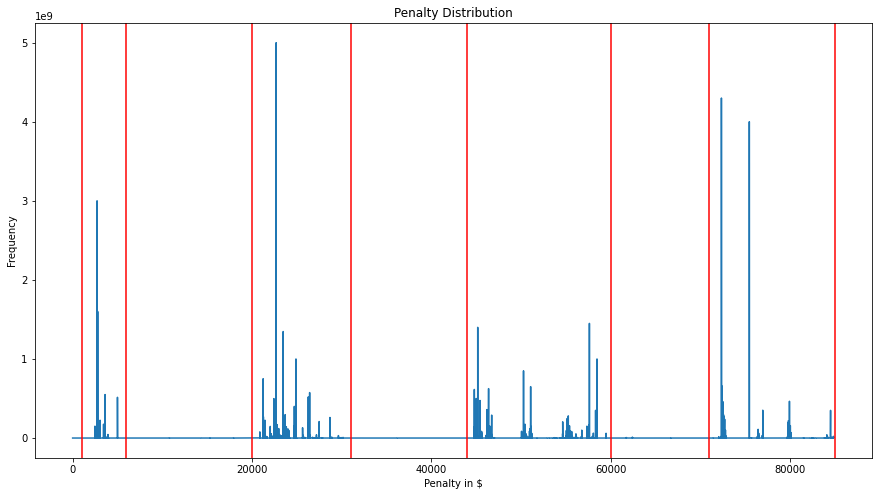

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(NFF_merged5.penalty)
plt.title('Penalty Distribution')
plt.ylabel('Frequency')
plt.xlabel('Penalty in $')
plt.axvline(x=1000, c='red')
plt.axvline(x=6000, c='red')
plt.axvline(x=20000, c='red')
plt.axvline(x=31000, c='red')
plt.axvline(x=44000, c='red')
plt.axvline(x=60000, c='red')
plt.axvline(x=71000, c='red')
plt.axvline(x=85000, c='red')

we can see that penalties are mostly in certain ranges.

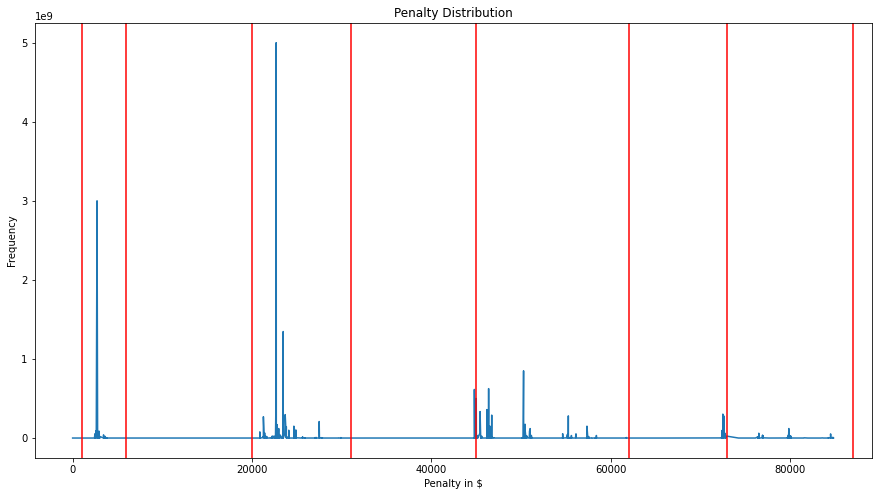

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(NFF_SPX.penalty)
plt.title('Penalty Distribution')
plt.ylabel('Frequency')
plt.xlabel('Penalty in $')
plt.axvline(x=1000, c='red')
plt.axvline(x=6000, c='red')
plt.axvline(x=20000, c='red')
plt.axvline(x=31000, c='red')
plt.axvline(x=45000, c='red')
plt.axvline(x=62000, c='red')
plt.axvline(x=73000, c='red')
plt.axvline(x=87000, c='red')

In [ ]:
#Save NFF_SPX
tickers = NFF_SPX.stock_ticker.value_counts().index.to_list()
pd.DataFrame(tickers).to_csv('tickers.txt', sep='\n', index=False)


In [ ]:
NFF_SPX[['stock_ticker', 'date']].to_csv('tickers_NFF_SPX.txt', sep=' ', index=False)

In [ ]:
writer = pd.ExcelWriter('tickers_NFF_SPX.xlsx')
# write dataframe to excel
NFF_SPX[['stock_ticker', 'date']].to_excel(writer)
# save the excel
writer.save()

In [ ]:
writer = pd.ExcelWriter('unique_tickers_NFF_SPX.xlsx')
# write dataframe to excel
pd.Series(NFF_SPX['stock_ticker'].unique()).to_excel(writer)
# save the excel
writer.save()

##Missing values

(84875, 53)


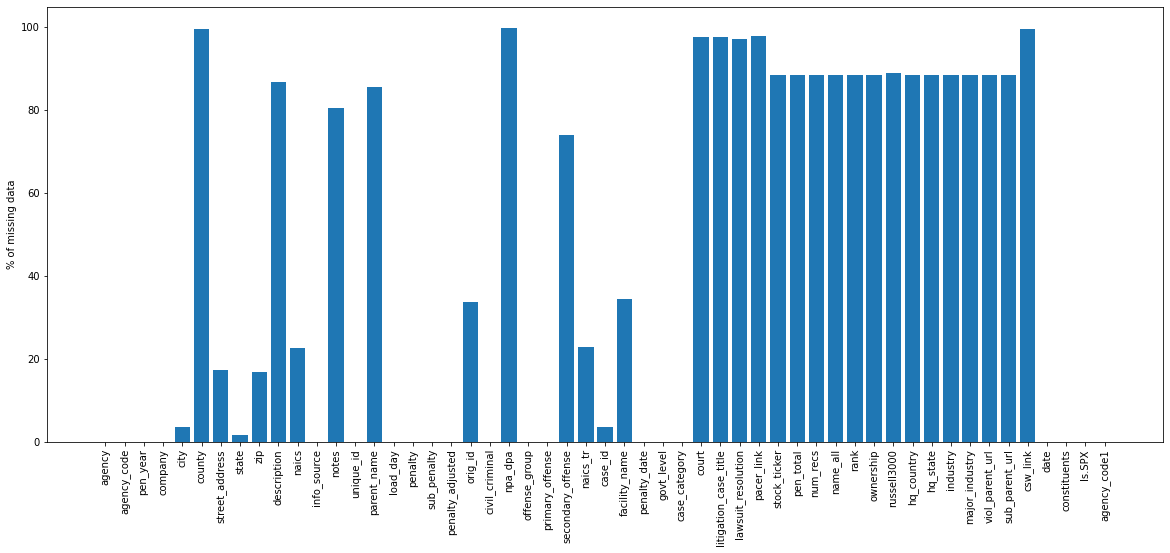

In [ ]:
# Missings report
NFF_merged5.replace([np.inf, -np.inf], np.nan)
Nulls_NFF_merged = NFF_merged5.isnull().sum()
plt.figure(figsize=(20,8))
plt.xticks(rotation="vertical")
plt.bar(Nulls_NFF_merged.index, 100*Nulls_NFF_merged.values/len(NFF_merged5.index))
plt.ylabel("% of missing data")
print(NFF_merged5.shape)

(6209, 53)


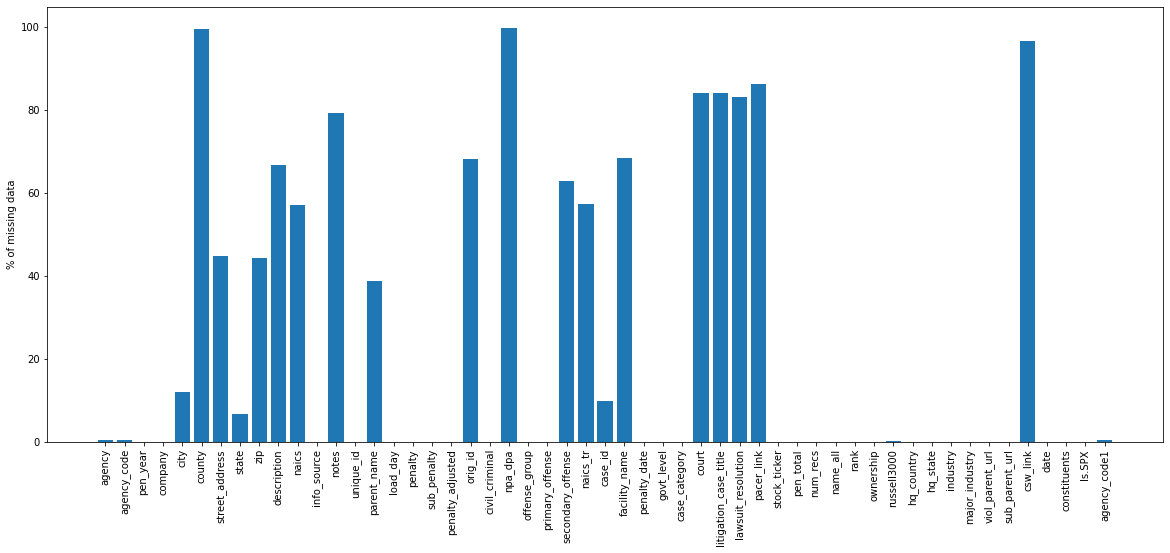

In [ ]:
# Missings report
NFF_SPX.replace([np.inf, -np.inf], np.nan)
Nulls_NFF_SPX = NFF_SPX.isnull().sum()
plt.figure(figsize=(20,8))
plt.xticks(rotation="vertical")
plt.bar(Nulls_NFF_SPX.index, 100*Nulls_NFF_SPX.values/len(NFF_SPX.index))
plt.ylabel("% of missing data")
print(NFF_SPX.shape)

(6209, 53)


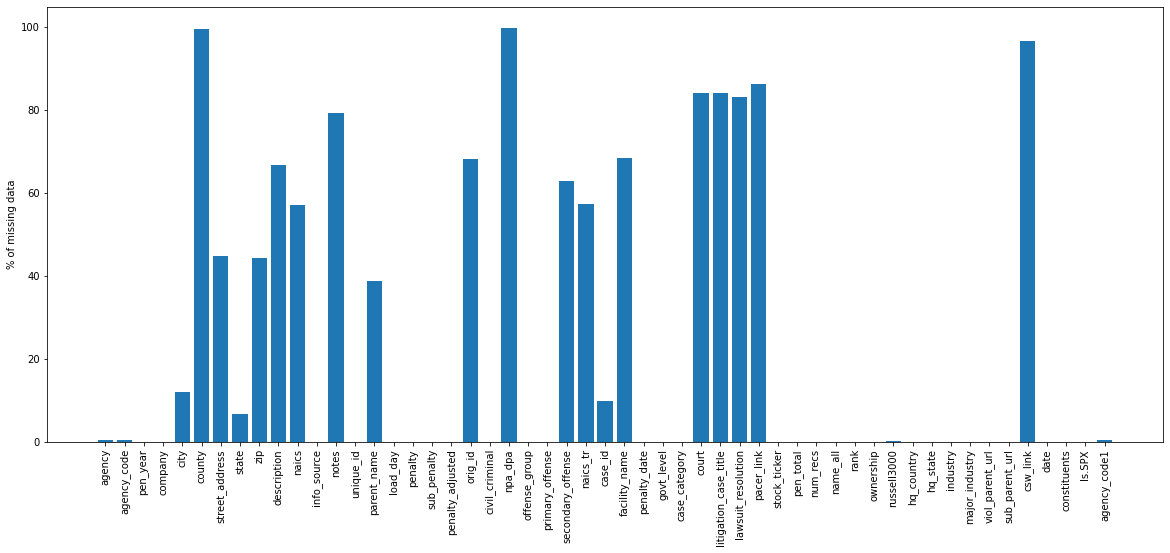

In [ ]:
Nulls_NFF_SPX = NFF_SPX.isnull().sum()
plt.figure(figsize=(20,8))
plt.xticks(rotation="vertical")
plt.bar(Nulls_NFF_SPX.index, 100*Nulls_NFF_SPX.values/len(NFF_SPX.index))
plt.ylabel("% of missing data")
print(NFF_SPX.shape)

##visualization in SPX Data

We can easily do the same for uniquly ligitated firms in S&P500 as well.

In [ ]:
#Since the only numerical values are the three ones below, we provide summary statistic table for tham and use group and value_count methods for categorical data.
NFF_SPX[['penalty', 'penalty_adjusted', 'pen_total']].describe()
#only penalty seems to be useful

,penalty,penalty_adjusted,pen_total
count,6.209000e+03,6.209000e+03,6.209000e+03
mean,3.784385e+06,3.707116e+06,5.083604e+09
std,7.951380e+07,7.945992e+07,1.591746e+10
min,5.000000e+03,0.000000e+00,2.101000e+04
25%,7.316000e+03,7.300000e+03,6.858761e+07
50%,1.293400e+04,1.279400e+04,4.361309e+08
75%,3.850000e+04,3.750000e+04,1.645848e+09
max,5.000000e+09,5.000000e+09,8.269568e+10


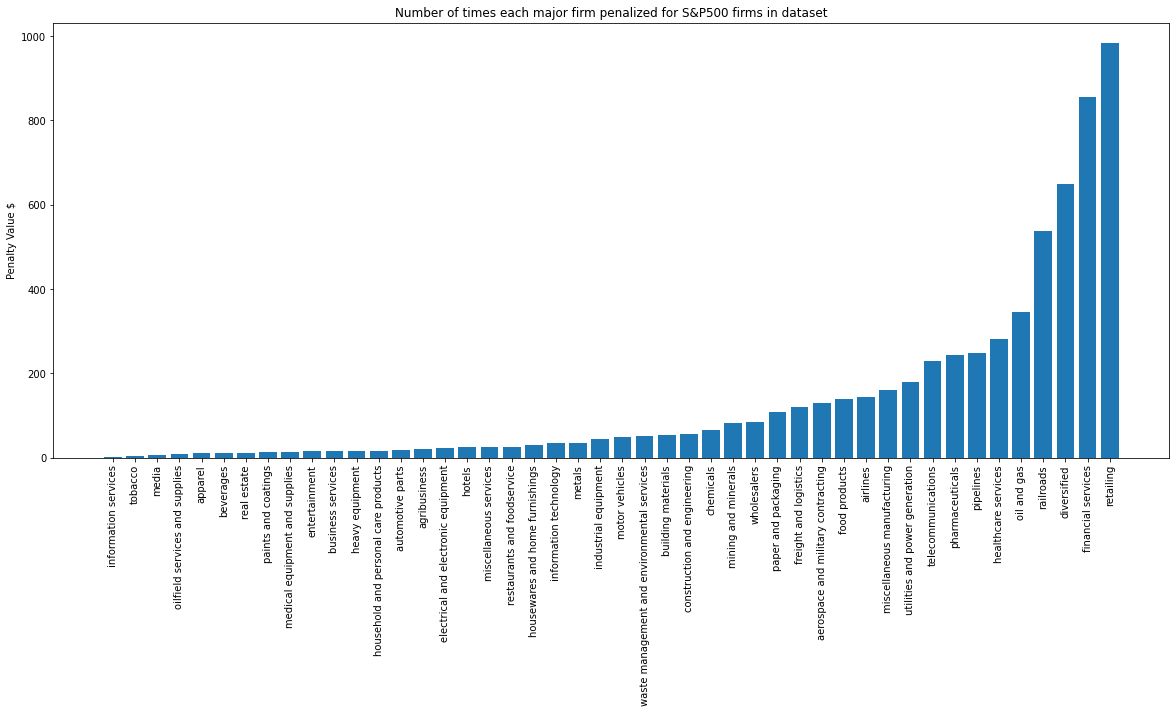

In [ ]:
#How industries are different in terms of times of penalties?
stat1 = NFF_SPX.groupby(['major_industry']).penalty.count()
stat1 = stat1.sort_values()
plt.figure(figsize=(20,8))
plt.xticks(rotation="vertical")
plt.bar(stat1.index, stat1)
plt.ylabel("Penalty Value $")
plt.title('Number of times each major firm penalized for S&P500 firms in dataset')
plt.show()

Conclusion:

As you can see, most of the litigation cases are in financial services, retailing, diversified and railroads.

Text(0.5, 1.0, 'Total penalty value in each major industry for S&P500 firms in dataset')

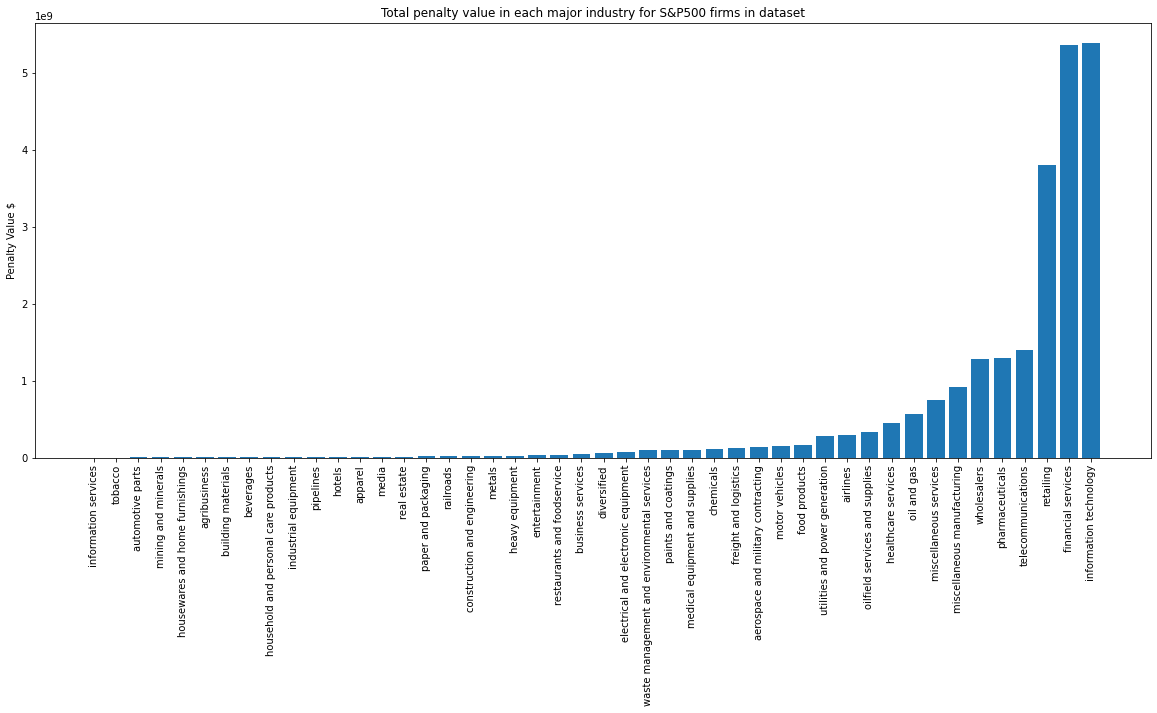

In [ ]:
#How industries are different in terms of sum of penalties?
stat2 = NFF_SPX.groupby(['major_industry']).penalty.sum()
stat2 = stat2.sort_values()
plt.figure(figsize=(20,8))
plt.xticks(rotation="vertical")
plt.bar(stat2.index, stat2)
plt.ylabel("Penalty Value $")
plt.title('Total penalty value in each major industry for S&P500 firms in dataset')

Conclusion:

Though information technologyy firms were ranked as the 25th major industry with number of litigation cases, they have the second most total penalty value. It seems that litigations against information tecchnology firms aim big compensations and convictions. Thus, it is expectable for them to have the highest average penalty value.

Text(0.5, 1.0, 'Average penalty value for major industries for S&p500 firms in dataset')

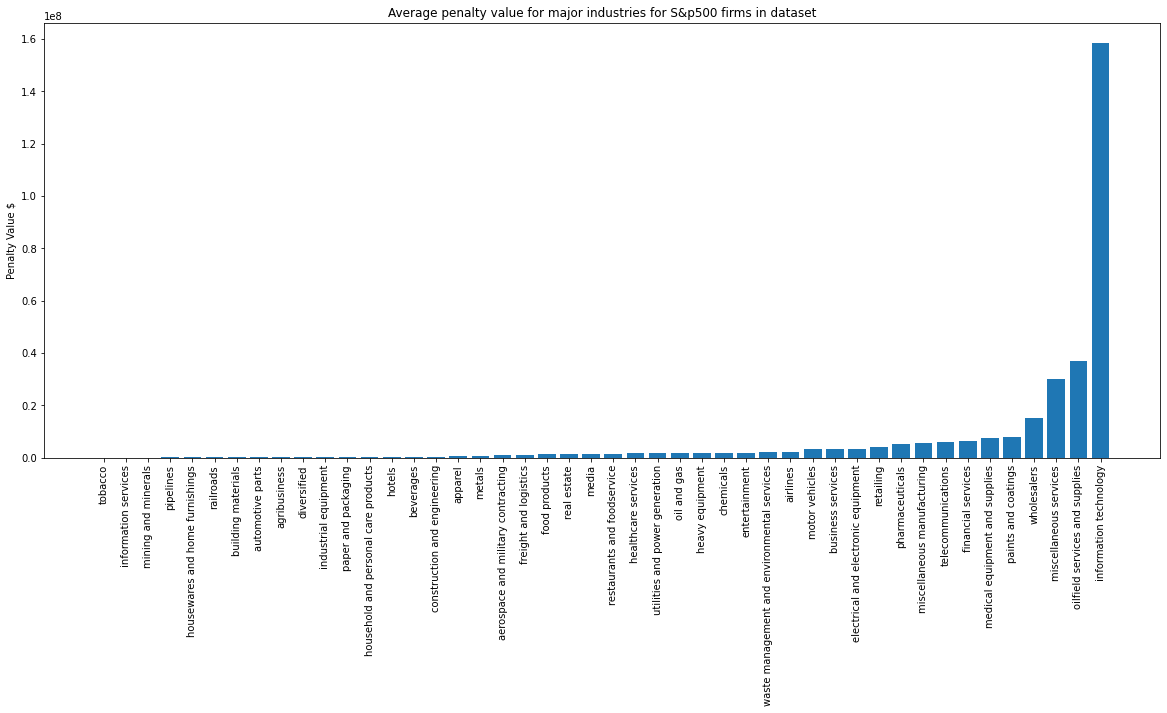

In [ ]:
#How industries are different in terms of penalties in average?
stat3 = NFF_SPX.groupby(['major_industry']).penalty.mean()
stat3 = stat3.sort_values()
plt.figure(figsize=(20,8))
plt.xticks(rotation="vertical")
plt.bar(stat3.index, stat3)
plt.ylabel("Penalty Value $")
plt.title('Average penalty value for major industries for S&p500 firms in dataset')

It's interesting that though oilfield services and supplies, miscellaneous services and wholesaleres does not have many litigations and nor a high value of total penalty, on average, their litigation cases have high penalties. This could be caused by high bad externalities these major industries have on workers and environment.

Text(0.5, 1.0, 'First 10 agencies with highest claim')

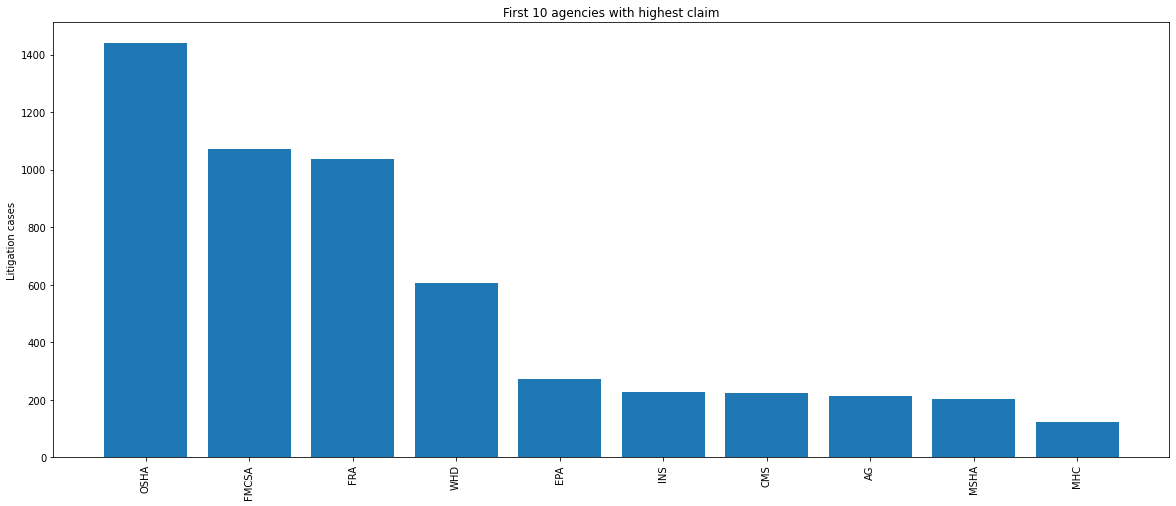

In [ ]:
#How industries are different in terms on penalties?
stat5 = NFF_SPX['agency_code1'].value_counts() 
plt.figure(figsize=(20,8))
plt.xticks(rotation="vertical")
plt.bar(stat5.index[0:10], stat5[0:10])
plt.ylabel("Litigation cases")
plt.title('First 10 agencies with highest claim')

##Uniquely sactioned firms by each agency (This part is totally wrong)

In [ ]:
'''
#How many times each Parent_company had penalty?
stat4 = NFF_SPX[['agency_code1','stock_ticker']].value_counts()
unique_vio = []
NFF_SPX['is.unique'] = np.nan
for i in range(len(NFF_SPX.stock_ticker)):
  if pd.notna(NFF_SPX.agency_code1.iloc[i])  and pd.notna(NFF_SPX.stock_ticker.iloc[i]):
    if stat4[(NFF_SPX.agency_code1.iloc[i], NFF_SPX.stock_ticker.iloc[i])] == 1:
      NFF_SPX['is.unique'].iloc[i] = 1
    else:
      NFF_SPX['is.unique'].iloc[i] = 0
  else:
    NFF_SPX['is.unique'].iloc[i] = 0

NFF_SPX['is.unique'].value_counts()
'''

"\n#How many times each Parent_company had penalty?\nstat4 = NFF_SPX[['agency_code1','stock_ticker']].value_counts()\nunique_vio = []\nNFF_SPX['is.unique'] = np.nan\nfor i in range(len(NFF_SPX.stock_ticker)):\n  if pd.notna(NFF_SPX.agency_code1.iloc[i])  and pd.notna(NFF_SPX.stock_ticker.iloc[i]):\n    if stat4[(NFF_SPX.agency_code1.iloc[i], NFF_SPX.stock_ticker.iloc[i])] == 1:\n      NFF_SPX['is.unique'].iloc[i] = 1\n    else:\n      NFF_SPX['is.unique'].iloc[i] = 0\n  else:\n    NFF_SPX['is.unique'].iloc[i] = 0\n\nNFF_SPX['is.unique'].value_counts()\n"

In [ ]:
'''
NFF_unique = NFF_SPX[NFF_SPX['is.unique'] == 1]
NFF_unique
'''

"\nNFF_unique = NFF_SPX[NFF_SPX['is.unique'] == 1]\nNFF_unique\n"

In [ ]:
'''
#Frequency of the agencies in total data
X = pd.DataFrame(NFF_unique.agency_code1.value_counts())
Y = X.reset_index()
Y.columns = ['col1', 'col2']
Y.sort_values(by=['col1'], axis=0)

agency_freq_unique = pd.DataFrame()
agency_freq_unique['agency'] = np.zeros(len(Y))
agency_freq_unique['frequency3'] = np.zeros(len(Y))
ss = 0
for i in range(len(Y)):
  ss += Y.col2.iloc[i]
for i in range(len(Y)):
  agency_freq_unique['agency'].iloc[i] = Y.col1.iloc[i]
  agency_freq_unique['frequency3'].iloc[i] = Y.col2.iloc[i]/ss
agency_freq_unique
'''

"\n#Frequency of the agencies in total data\nX = pd.DataFrame(NFF_unique.agency_code1.value_counts())\nY = X.reset_index()\nY.columns = ['col1', 'col2']\nY.sort_values(by=['col1'], axis=0)\n\nagency_freq_unique = pd.DataFrame()\nagency_freq_unique['agency'] = np.zeros(len(Y))\nagency_freq_unique['frequency3'] = np.zeros(len(Y))\nss = 0\nfor i in range(len(Y)):\n  ss += Y.col2.iloc[i]\nfor i in range(len(Y)):\n  agency_freq_unique['agency'].iloc[i] = Y.col1.iloc[i]\n  agency_freq_unique['frequency3'].iloc[i] = Y.col2.iloc[i]/ss\nagency_freq_unique\n"

In [ ]:
'''
ag_freq = pd.merge(agency_freq_Total, agency_freq_SPX, on='agency', how='left')
ag_ult_freq = pd.merge(ag_freq, agency_freq_unique, on='agency', how='left')
# create excel writer object
writer = pd.ExcelWriter('Agency_frequency_byData.xlsx')
# write dataframe to excel
ag_ult_freq.to_excel(writer)
# save the excel
writer.save()
'''

"\nag_freq = pd.merge(agency_freq_Total, agency_freq_SPX, on='agency', how='left')\nag_ult_freq = pd.merge(ag_freq, agency_freq_unique, on='agency', how='left')\n# create excel writer object\nwriter = pd.ExcelWriter('Agency_frequency_byData.xlsx')\n# write dataframe to excel\nag_ult_freq.to_excel(writer)\n# save the excel\nwriter.save()\n"

In [ ]:
NFF_SPX.stock_ticker.value_counts()

BRK.B    466
KMI      244
UNP      235
DLTR     223
BAC      211
        ... 
DRI        1
UNM        1
AYI        1
COG        1
R          1
Name: stock_ticker, Length: 326, dtype: int64

In [ ]:
#agencies groups
NFF_SPX.agency_code1.value_counts()

OSHA             1440
FMCSA            1072
FRA              1037
WHD               605
EPA               271
INS               227
CMS               222
AG                214
MSHA              204
MHC               123
FAA               121
NLRB              110
EEOC               74
OFCCP              57
USAO               53
FIN                35
EBSA               30
DBO                27
FCC                23
DFS                23
BSEE               22
MULTI              21
DOJ_CIVIL          20
SEC                14
FTC                14
PHMSA              11
ACPD               11
HHSOIG              9
CFPB                9
DLI                 9
FERC                7
CFTC                6
BIS                 6
DOJ_CRIMINAL        6
HHSOCR              5
DOJ_RIGHTS          4
DEA                 4
HUD                 4
ED                  3
OFR                 3
DOJ_ANTITRUST       3
NRC                 2
DDTC                2
DBI                 2
AMS                 2
LCO       

(6209, 53)


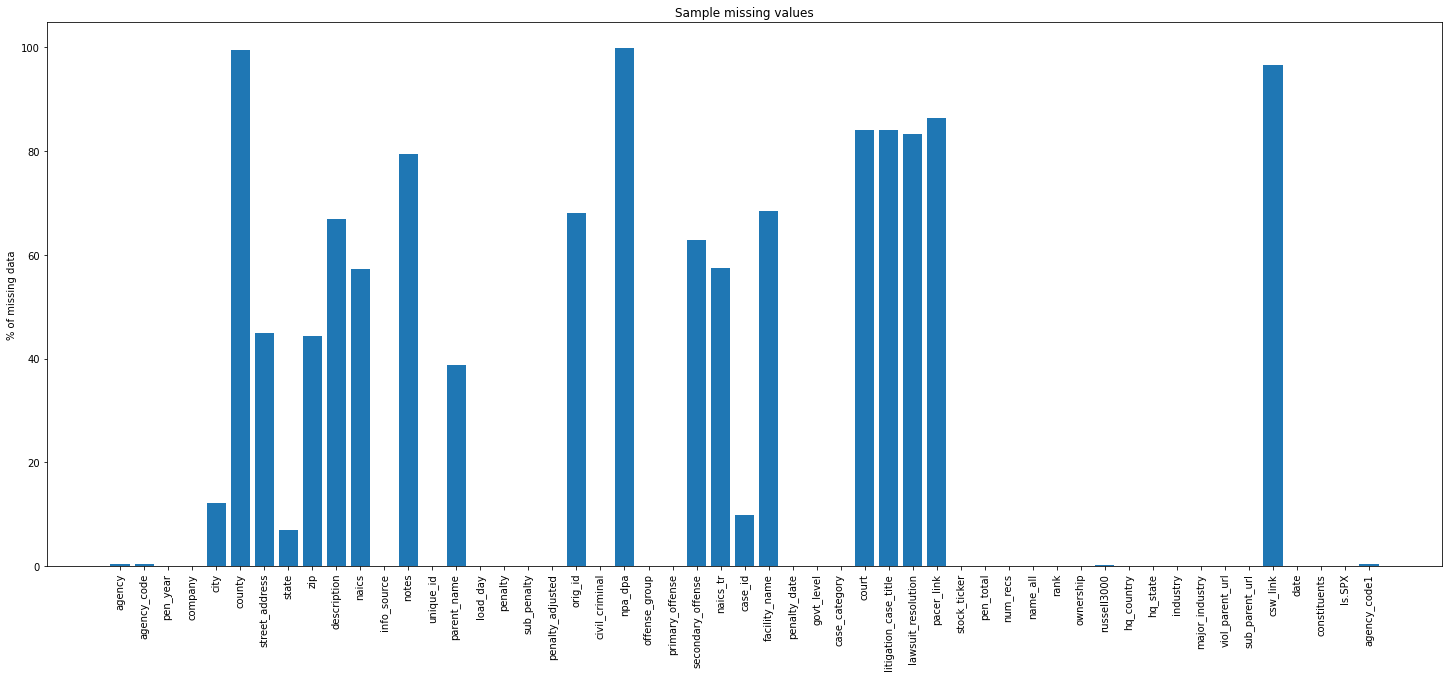

In [ ]:
# Missings report
NFF_SPX.replace([np.inf, -np.inf], np.nan)
Nulls_NFF_merged = NFF_SPX.isnull().sum()
plt.figure(figsize=(25,10))
plt.xticks(rotation="vertical")
plt.bar(Nulls_NFF_merged.index, 100*Nulls_NFF_merged.values/len(NFF_SPX.index))
plt.ylabel("% of missing data")
plt.title('Sample missing values')
print(NFF_SPX.shape)

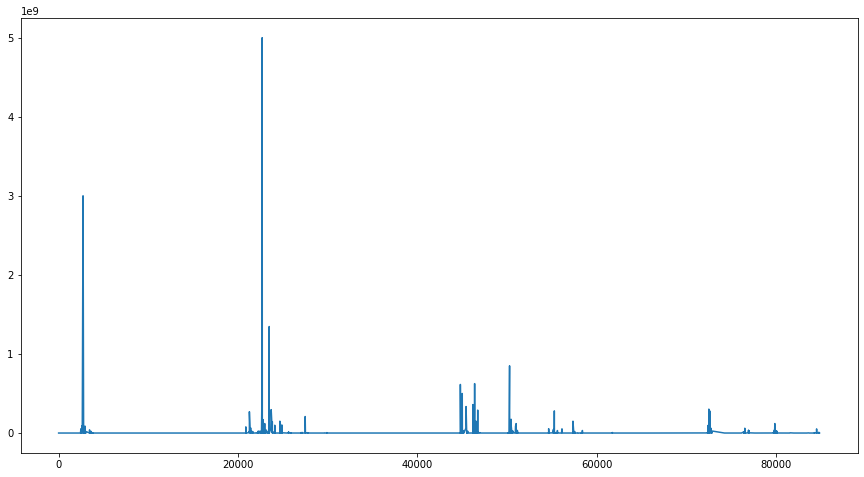

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.plot(NFF_SPX.penalty)

In [ ]:
#Since the only numerical values are the three ones below, we provide summary statistic table for tham and use group and value_count methods for categorical data.
NFF_SPX[['penalty', 'penalty_adjusted', 'pen_total']].describe(percentiles=[0.1 ,0.90])
#only penalty seems to be useful

,penalty,penalty_adjusted,pen_total
count,6.209000e+03,6.209000e+03,6.209000e+03
mean,3.784385e+06,3.707116e+06,5.083604e+09
std,7.951380e+07,7.945992e+07,1.591746e+10
min,5.000000e+03,0.000000e+00,2.101000e+04
10%,5.625000e+03,5.600000e+03,2.225879e+07
50%,1.293400e+04,1.279400e+04,4.361309e+08
90%,2.800000e+05,2.594512e+05,4.797463e+09
max,5.000000e+09,5.000000e+09,8.269568e+10


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('SPX_Misconduct_ByAgency.xlsx')
# write dataframe to excel
NFF_SPX.to_excel(writer)
# save the excel
writer.save()

### Descriptive statistics

In [ ]:
def desc_stat_count(df, by, col_name, title, ylabel):
  stat1 = df.groupby([by]).penalty.count()
  stat1 = stat1.sort_values()/stat1.sum()
  plt.figure(figsize=(20,8))
  plt.xticks(rotation="vertical")
  plt.bar(stat1.index, stat1)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()
  result = pd.DataFrame(stat1)
  result.columns = [col_name]
  return result

def desc_stat_TotPenal(df, by, col_name, title, ylabel):
  stat2 = df.groupby(by).penalty.sum()
  stat2 = stat2.sort_values()/df.penalty.sum()
  plt.figure(figsize=(20,8))
  plt.xticks(rotation="vertical")
  plt.bar(stat2.index, stat2)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()
  result = pd.DataFrame(stat2)
  result.columns = [col_name]
  return result

def desc_stat_AvgRatio(df, by, col_name, title, ylabel):
  #How industries are different in terms of penalties in average?
  stat3 = df.groupby(by).penalty.mean()
  stat3 = stat3.sort_values()/df.penalty.mean()
  plt.figure(figsize=(20,8))
  plt.xticks(rotation="vertical")
  plt.bar(stat3.index, stat3)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show()
  result = pd.DataFrame(stat3)
  result.columns = [col_name]
  return result

#### Panel A

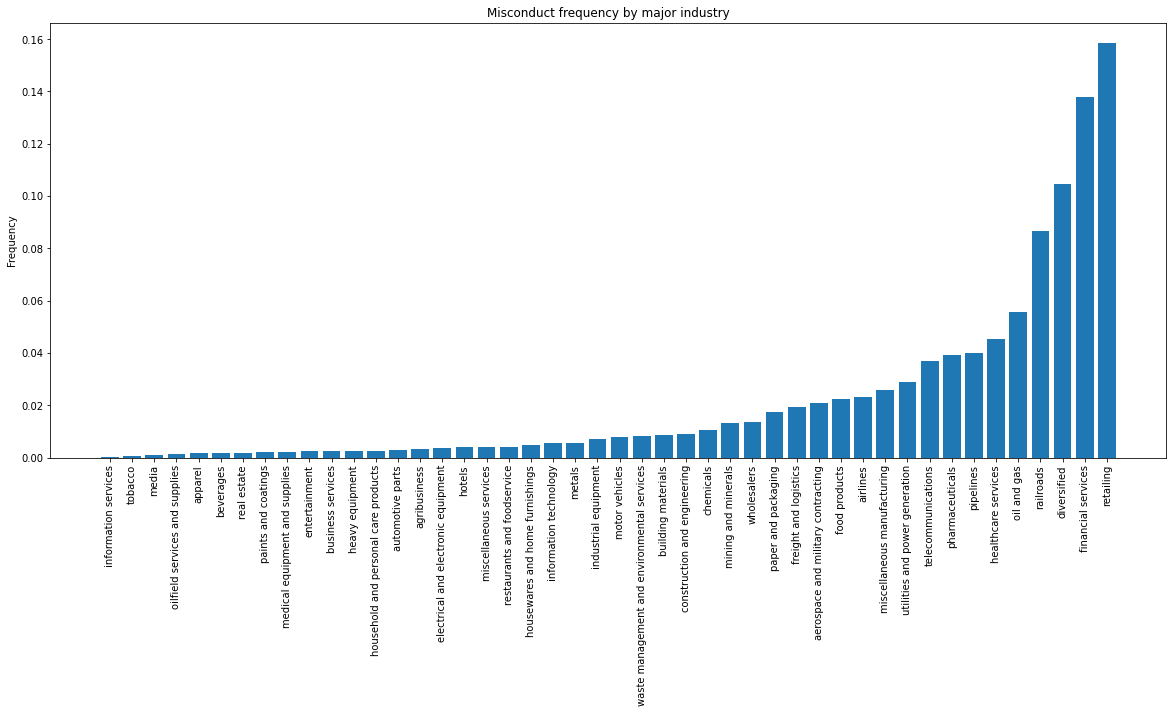

,Penalty frequency (%)
major_industry,
information services,0.000161
tobacco,0.000483
media,0.001127
oilfield services and supplies,0.001450
apparel,0.001611
beverages,0.001611
real estate,0.001611
paints and coatings,0.002094
medical equipment and supplies,0.002255


In [ ]:
P1A1 = desc_stat_count(NFF_SPX, 'major_industry', 'Penalty frequency (%)', 'Misconduct frequency by major industry', 'Frequency')
P1A1

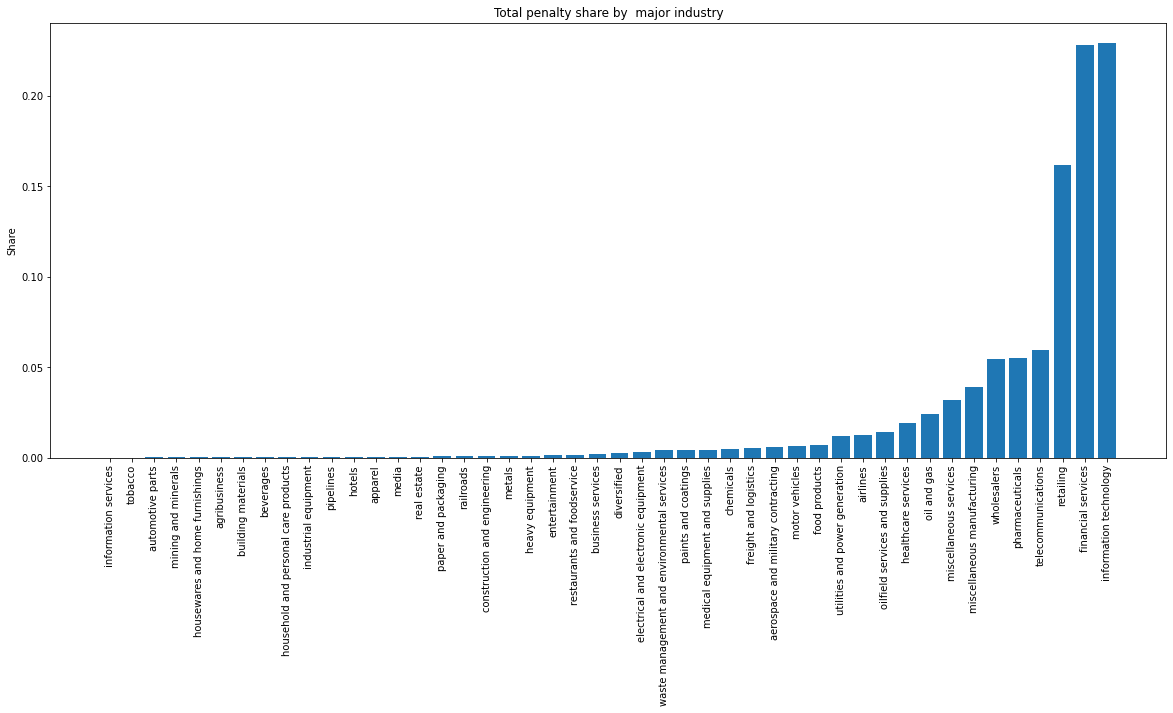

In [ ]:
P1A2 = desc_stat_TotPenal(NFF_SPX, 'major_industry', 'Tatal Penalty Share (%)', 'Total penalty share by  major industry', 'Share')


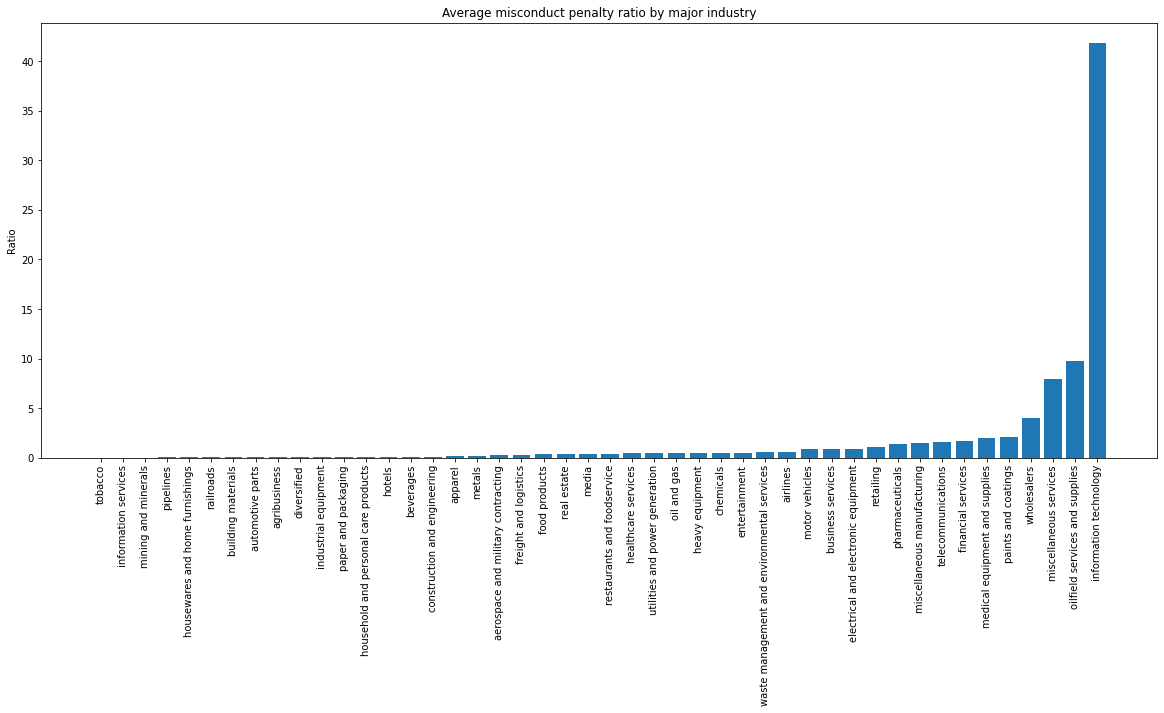

,Avg. Penalty Ratio
major_industry,
tobacco,0.002235
information services,0.002436
mining and minerals,0.002438
pipelines,0.005666
housewares and home furnishings,0.008339
railroads,0.008636
building materials,0.010486
automotive parts,0.011311
agribusiness,0.017159


In [ ]:
P1A3 = desc_stat_AvgRatio(NFF_SPX, 'major_industry', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by major industry', 'Ratio')
P1A3

In [ ]:
temp = pd.merge(P1A1*100, P1A2*100, left_index=True, right_index=True)
T1PanelA = pd.merge(temp, P1A3, left_index=True, right_index=True)
T1PanelA

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
major_industry,,,
information services,0.016106,0.000039,0.002436
tobacco,0.048317,0.000108,0.002235
media,0.112740,0.043233,0.383473
oilfield services and supplies,0.144951,1.408075,9.714156
apparel,0.161057,0.028233,0.175300
beverages,0.161057,0.011740,0.072892
real estate,0.161057,0.053709,0.333479
paints and coatings,0.209373,0.433918,2.072460
medical equipment and supplies,0.225479,0.433985,1.924725


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelA.xlsx')
# write dataframe to excel
T1PanelA.to_excel(writer)
# save the excel
writer.save()

#### Panel B

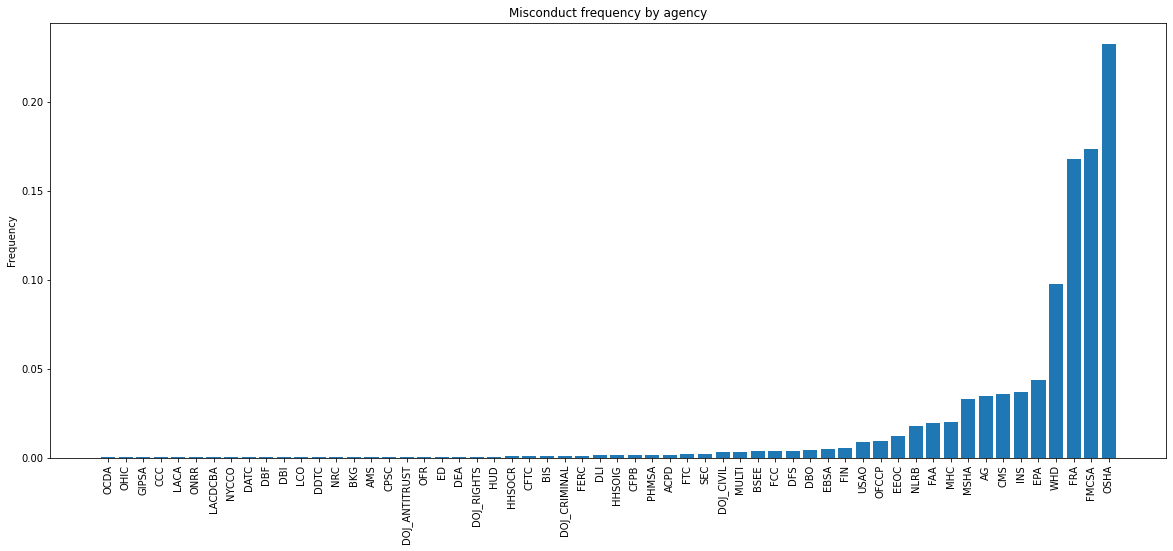

,Penalty frequency (%)
agency_code1,
OCDA,0.000162
OHIC,0.000162
GIPSA,0.000162
CCC,0.000162
LACA,0.000162
ONRR,0.000162
LACDCBA,0.000162
NYCCO,0.000162
DATC,0.000162


In [ ]:
P1B1 = desc_stat_count(NFF_SPX, 'agency_code1', 'Penalty frequency (%)', 'Misconduct frequency by agency', 'Frequency')
P1B1

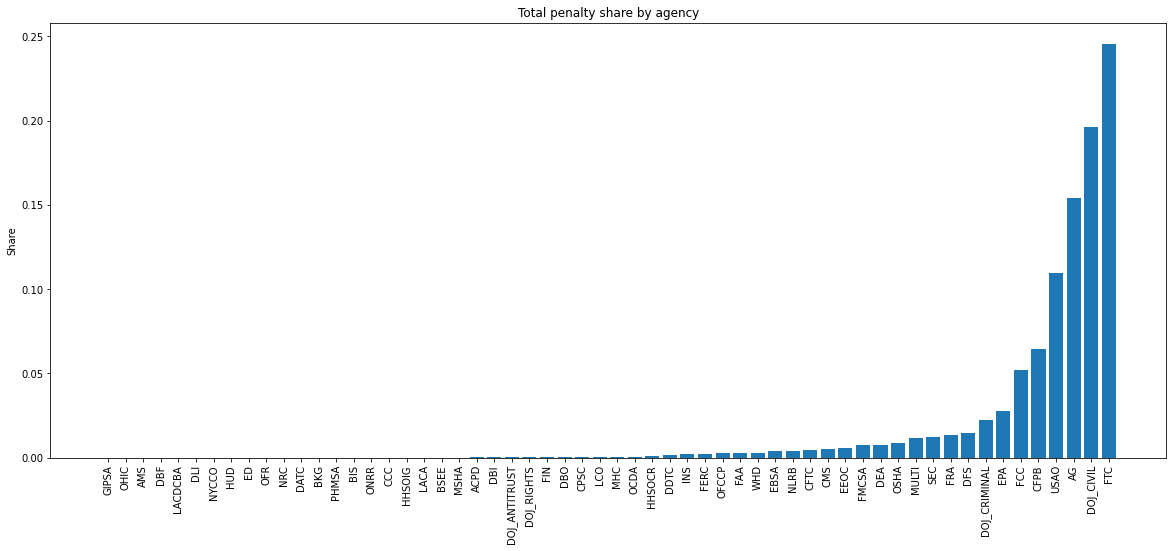

,Tatal Penalty Share (%)
agency_code1,
GIPSA,3.191863e-07
OHIC,4.255818e-07
AMS,5.532563e-07
DBF,5.958145e-07
LACDCBA,4.681400e-06
DLI,5.258999e-06
NYCCO,6.085820e-06
HUD,6.521105e-06
ED,6.745471e-06


In [ ]:
P1B2 = desc_stat_TotPenal(NFF_SPX, 'agency_code1', 'Tatal Penalty Share (%)', 'Total penalty share by agency', 'Share')
P1B2

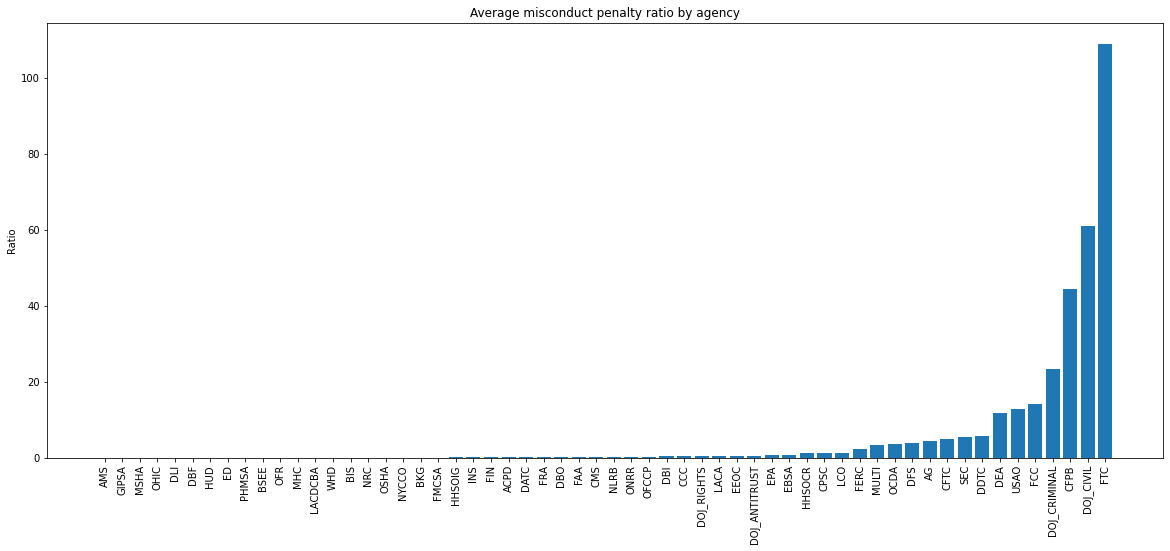

,Avg. Penalty Ratio
agency_code1,
AMS,0.001718
GIPSA,0.001982
MSHA,0.002572
OHIC,0.002642
DLI,0.003628
DBF,0.003699
HUD,0.010122
ED,0.013961
PHMSA,0.015672


In [ ]:
P1B3 = desc_stat_AvgRatio(NFF_SPX, 'agency_code1', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by agency', 'Ratio')
P1B3

In [ ]:
temp = pd.merge(P1B1*100, P1B2*100, left_index=True, right_index=True)
T1PanelB = pd.merge(temp, P1B3, left_index=True, right_index=True)
T1PanelB

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
agency_code1,,,
OCDA,0.016173,0.059156,3.672988
OHIC,0.016173,0.000043,0.002642
GIPSA,0.016173,0.000032,0.001982
CCC,0.016173,0.006384,0.396366
LACA,0.016173,0.007448,0.462427
ONRR,0.016173,0.003788,0.235177
LACDCBA,0.016173,0.000468,0.029067
NYCCO,0.016173,0.000609,0.037787
DATC,0.016173,0.001245,0.077291


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelB.xlsx')
# write dataframe to excel
T1PanelB.to_excel(writer)
# save the excel
writer.save()

In [ ]:
Table1 = NFF_SPX.agency_code1.value_counts()/NFF_SPX.agency_code1.value_counts().sum()
desired_agencies = ['OSHA', 'WHD', 'FAA', 'NLRB']
Table1[desired_agencies]

OSHA    0.232897
WHD     0.097849
FAA     0.019570
NLRB    0.017791
Name: agency_code1, dtype: float64

#### Panel C

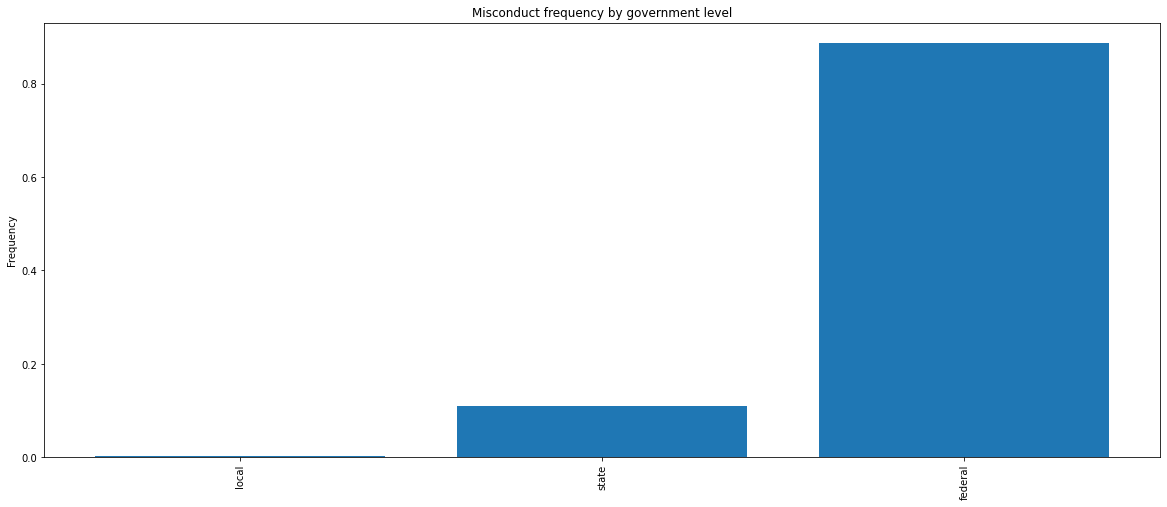

,Penalty frequency (%)
govt_level,
local,0.004026
state,0.109841
federal,0.886133


In [ ]:
P1C1 = desc_stat_count(NFF_SPX, 'govt_level', 'Penalty frequency (%)', 'Misconduct frequency by government level', 'Frequency')
P1C1

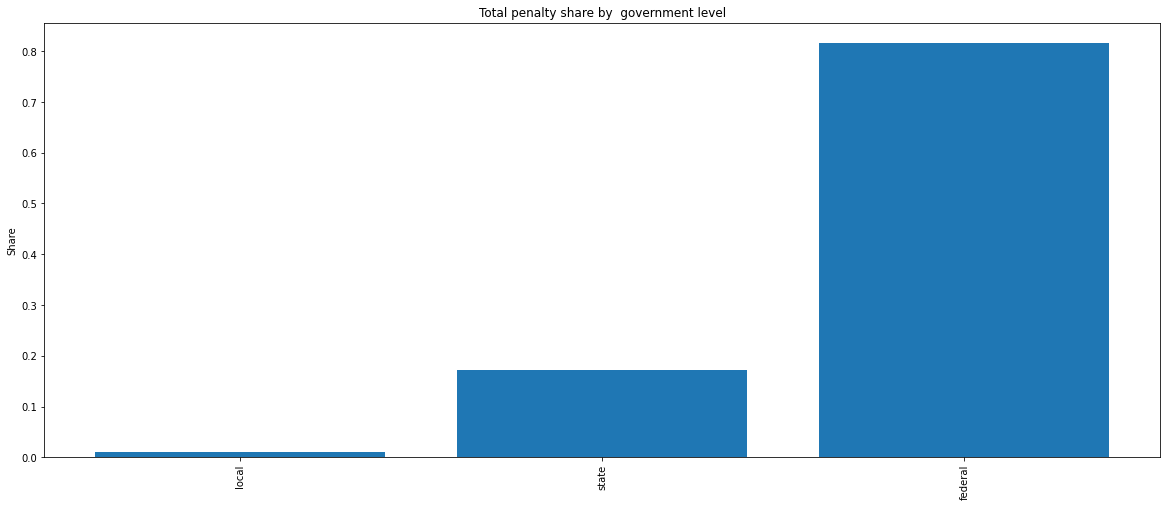

,Tatal Penalty Share (%)
govt_level,
local,0.011592
state,0.172986
federal,0.815423


In [ ]:
P1C2 = desc_stat_TotPenal(NFF_SPX, 'govt_level', 'Tatal Penalty Share (%)', 'Total penalty share by  government level', 'Share')
P1C2

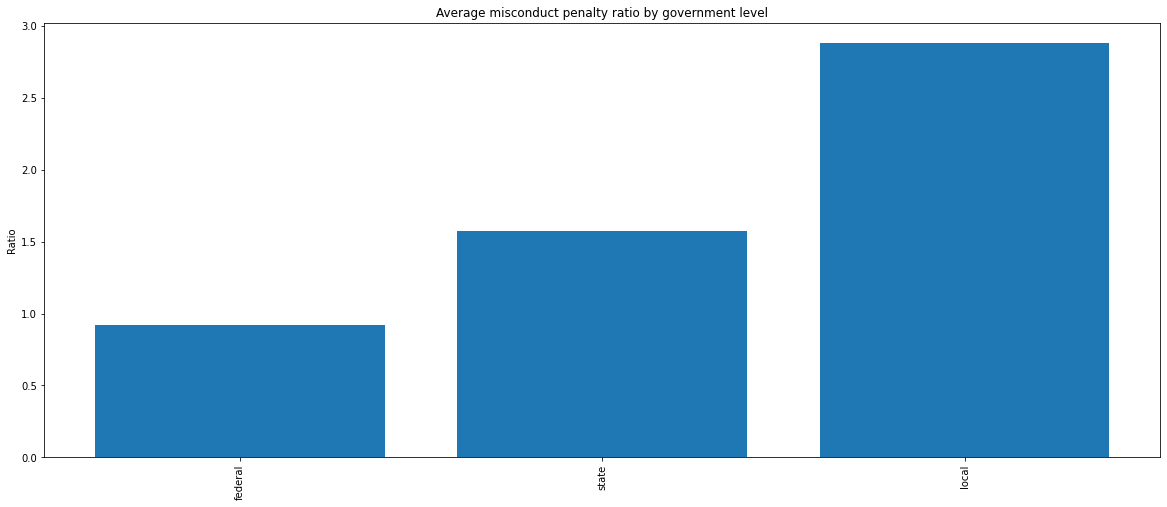

,Avg. Penalty Ratio
govt_level,
federal,0.920203
state,1.574881
local,2.878890


In [ ]:
P1C3 = desc_stat_AvgRatio(NFF_SPX, 'govt_level', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by government level', 'Ratio')
P1C3

In [ ]:
temp = pd.merge(P1C1*100, P1C2*100, left_index=True, right_index=True)
T1PanelC = pd.merge(temp, P1C3, left_index=True, right_index=True)
T1PanelC

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
govt_level,,,
local,0.402641,1.159160,2.878890
state,10.984055,17.298575,1.574881
federal,88.613303,81.542265,0.920203


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelC.xlsx')
# write dataframe to excel
T1PanelC.to_excel(writer)
# save the excel
writer.save()

#### Panel D

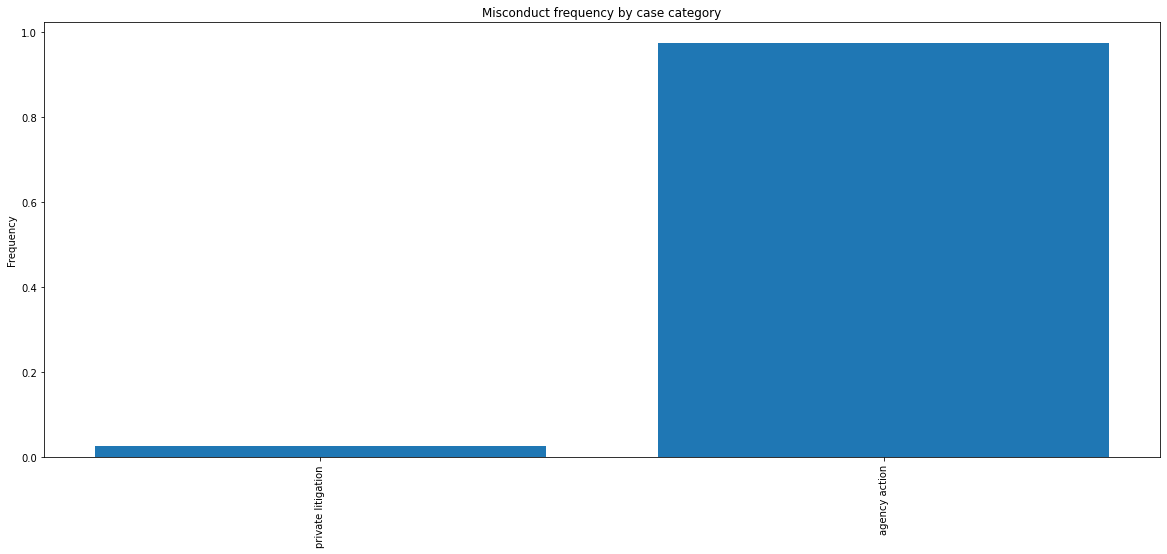

,Penalty frequency (%)
case_category,
private litigation,0.026574
agency action,0.973426


In [ ]:
P1D1 = desc_stat_count(NFF_SPX, 'case_category', 'Penalty frequency (%)', 'Misconduct frequency by case category', 'Frequency')
P1D1

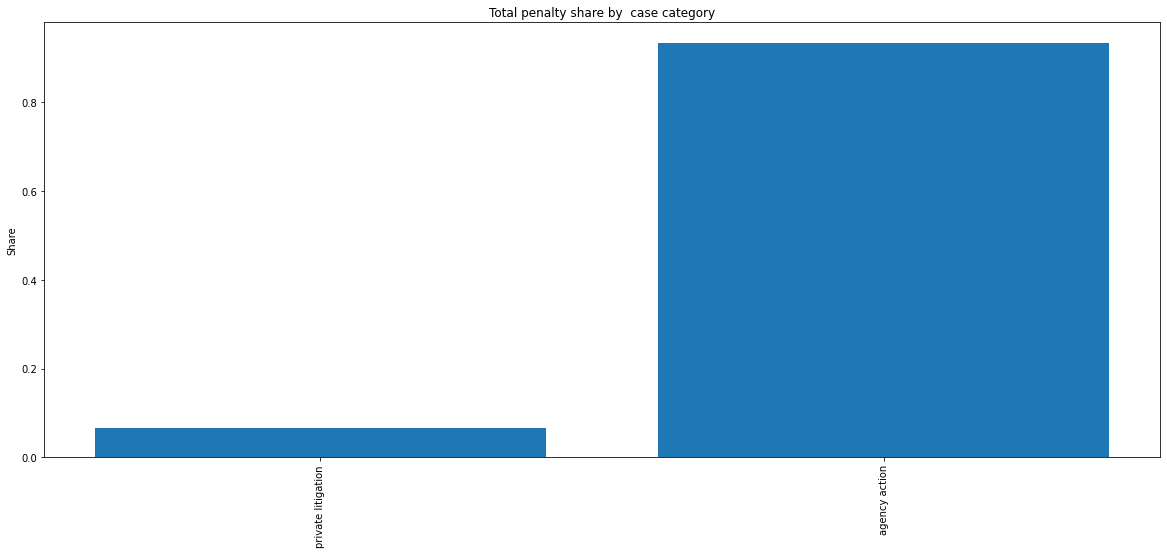

,Tatal Penalty Share (%)
case_category,
private litigation,0.066659
agency action,0.933341


In [ ]:
P1D2 = desc_stat_TotPenal(NFF_SPX, 'case_category', 'Tatal Penalty Share (%)', 'Total penalty share by  case category', 'Share')
P1D2

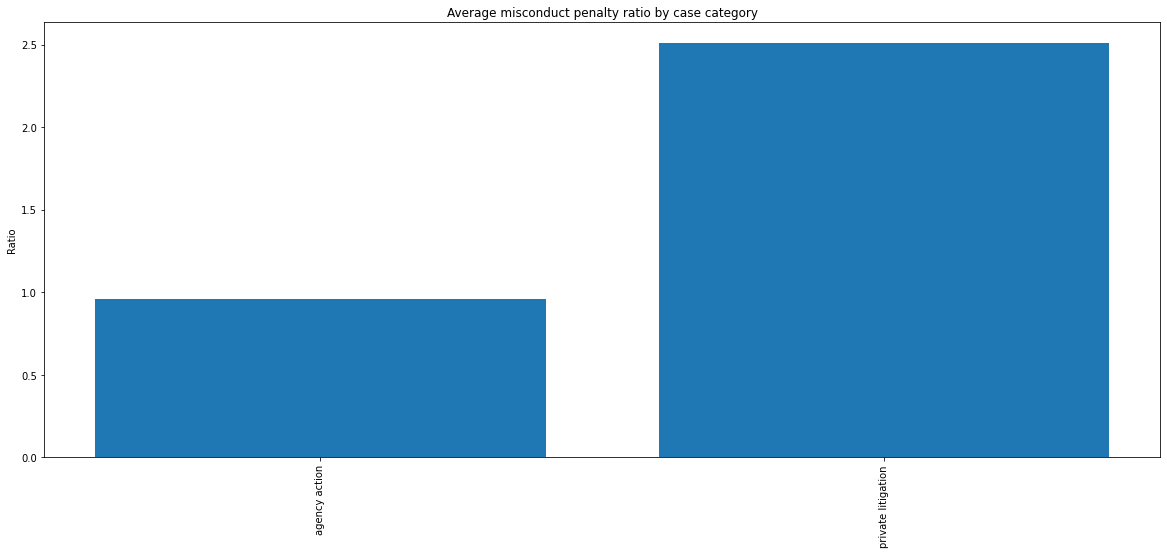

,Avg. Penalty Ratio
case_category,
agency action,0.958821
private litigation,2.508410


In [ ]:
P1D3 = desc_stat_AvgRatio(NFF_SPX, 'case_category', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by case category', 'Ratio')
P1D3

In [ ]:
temp = pd.merge(P1D1*100, P1D2*100, left_index=True, right_index=True)
T1PanelD = pd.merge(temp, P1D3, left_index=True, right_index=True)
T1PanelD

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
case_category,,,
private litigation,2.657433,6.665932,2.508410
agency action,97.342567,93.334068,0.958821


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelD.xlsx')
# write dataframe to excel
T1PanelD.to_excel(writer)
# save the excel
writer.save()

#### Panel E

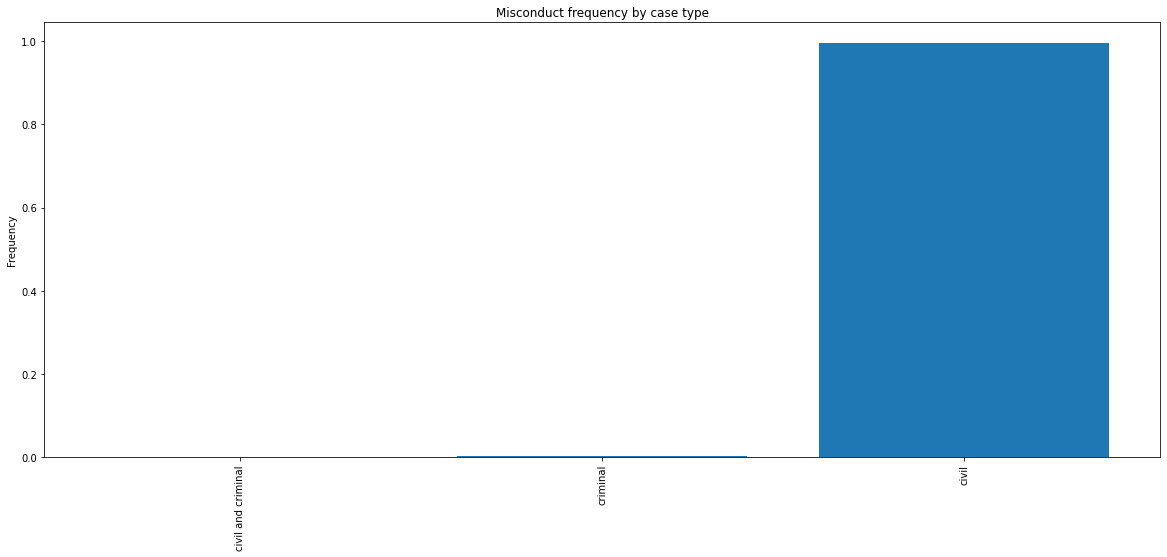

,Penalty frequency (%)
civil_criminal,
civil and criminal,0.000966
criminal,0.004026
civil,0.995007


In [ ]:
P1E1 = desc_stat_count(NFF_SPX, 'civil_criminal', 'Penalty frequency (%)', 'Misconduct frequency by case type', 'Frequency')
P1E1

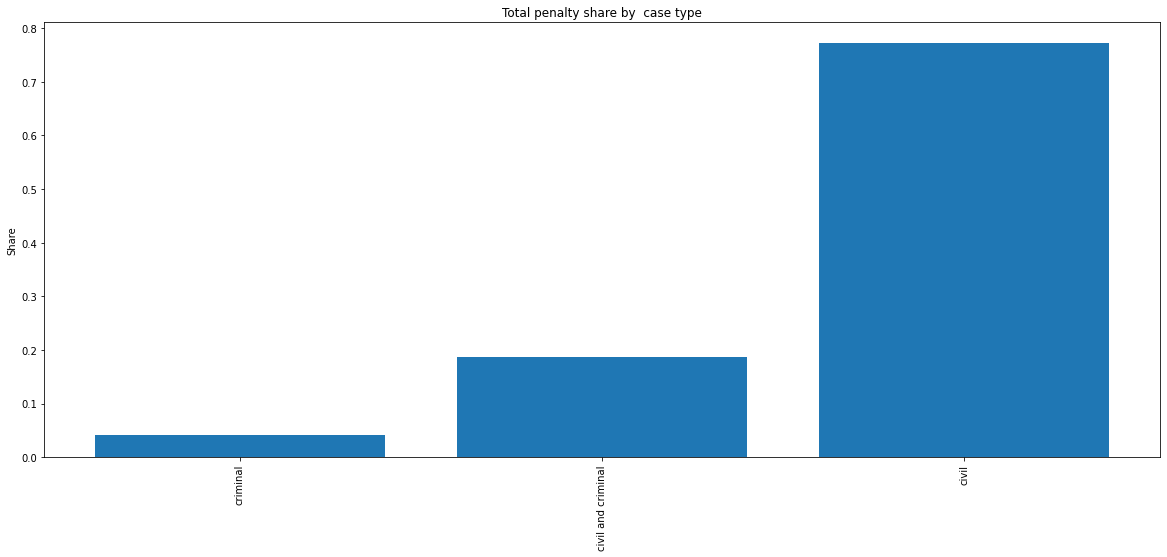

,Tatal Penalty Share (%)
civil_criminal,
criminal,0.040654
civil and criminal,0.187259
civil,0.772087


In [ ]:
P1E2 = desc_stat_TotPenal(NFF_SPX, 'civil_criminal', 'Tatal Penalty Share (%)', 'Total penalty share by  case type', 'Share')
P1E2

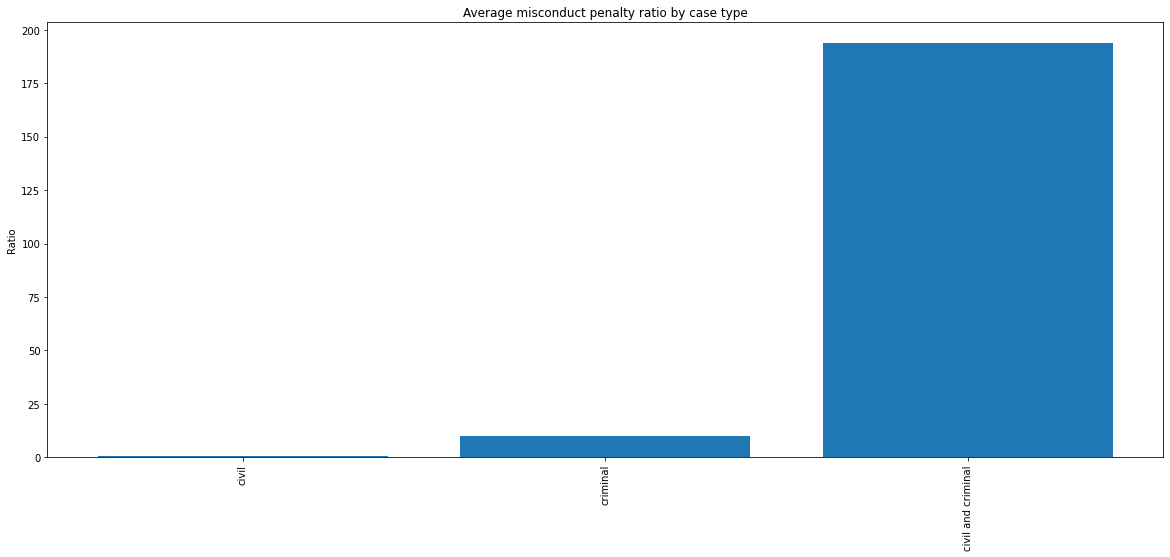

,Avg. Penalty Ratio
civil_criminal,
civil,0.775961
criminal,10.096830
civil and criminal,193.781731


In [ ]:
P1E3 = desc_stat_AvgRatio(NFF_SPX, 'civil_criminal', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by case type', 'Ratio')
P1E3

In [ ]:
temp = pd.merge(P1E1*100, P1E2*100, left_index=True, right_index=True)
T1PanelE = pd.merge(temp, P1E3, left_index=True, right_index=True)
T1PanelE

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
civil_criminal,,,
civil and criminal,0.096634,18.725888,193.781731
criminal,0.402641,4.065401,10.096830
civil,99.500725,77.208711,0.775961


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelE.xlsx')
# write dataframe to excel
T1PanelE.to_excel(writer)
# save the excel
writer.save()

#### Panel F

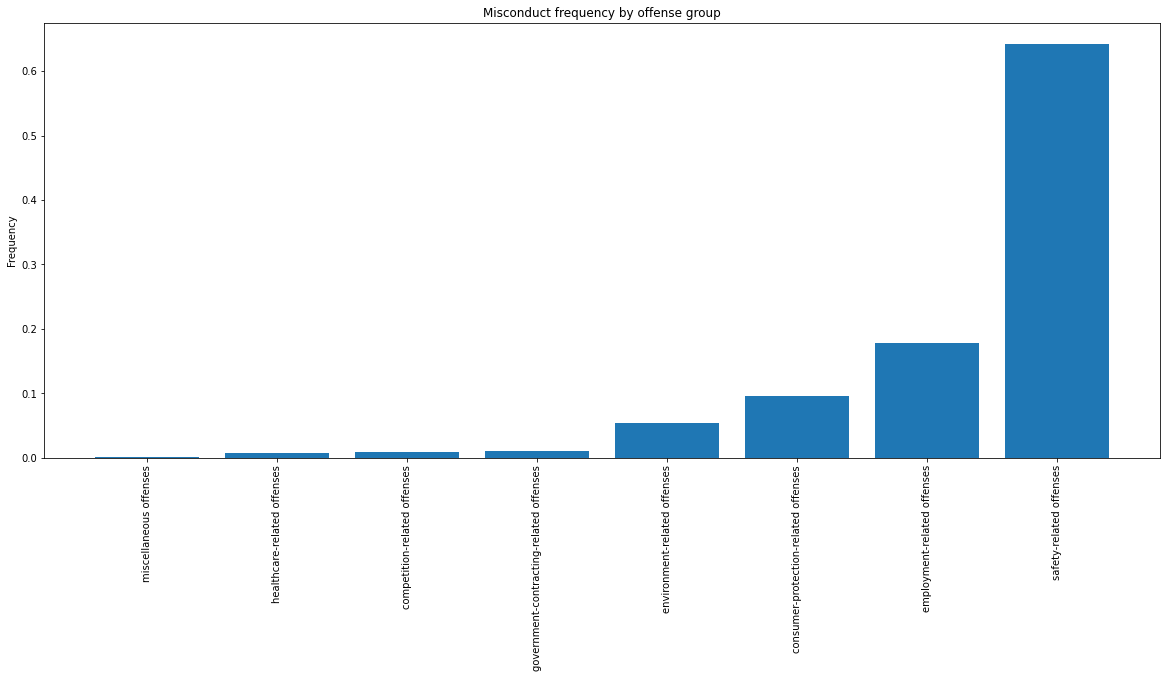

,Penalty frequency (%)
offense_group,
miscellaneous offenses,0.000805
healthcare-related offenses,0.007892
competition-related offenses,0.009502
government-contracting-related offenses,0.011113
environment-related offenses,0.053793
consumer-protection-related offenses,0.096151
employment-related offenses,0.178451
safety-related offenses,0.642293


In [ ]:
P1F1 = desc_stat_count(NFF_SPX, 'offense_group', 'Penalty frequency (%)', 'Misconduct frequency by offense group', 'Frequency')
P1F1

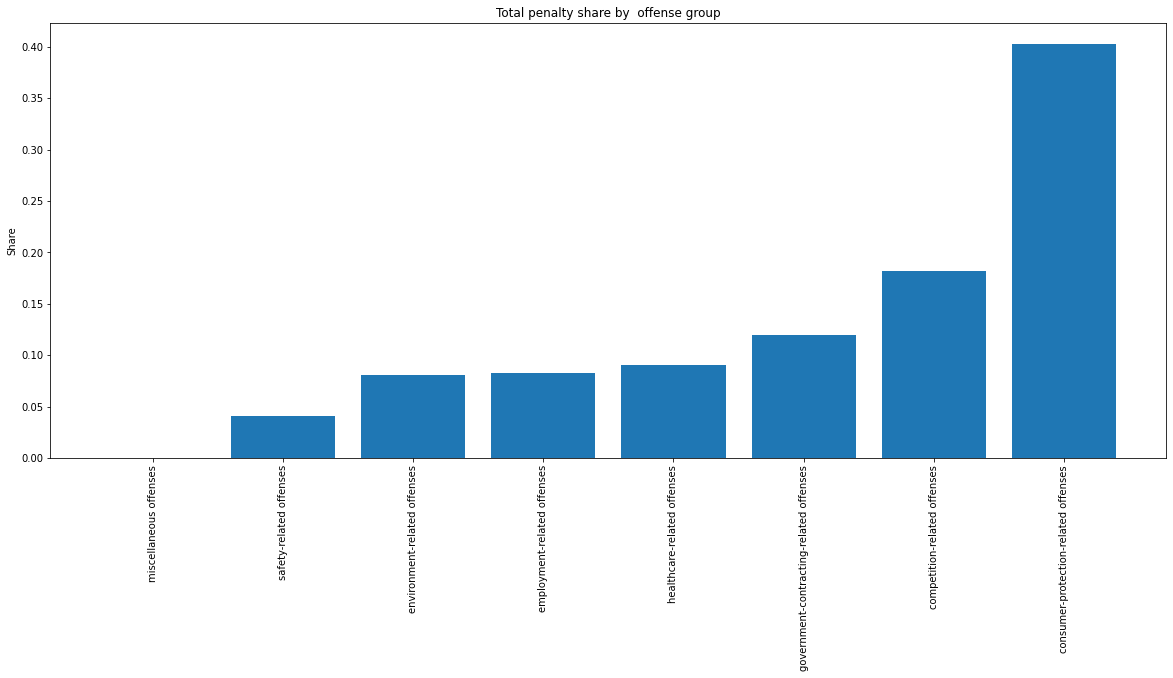

,Tatal Penalty Share (%)
offense_group,
miscellaneous offenses,0.000092
safety-related offenses,0.041061
environment-related offenses,0.081134
employment-related offenses,0.082562
healthcare-related offenses,0.090636
government-contracting-related offenses,0.119202
competition-related offenses,0.182319
consumer-protection-related offenses,0.402994


In [ ]:
P1F2 = desc_stat_TotPenal(NFF_SPX, 'offense_group', 'Tatal Penalty Share (%)', 'Total penalty share by  offense group', 'Share')
P1F2

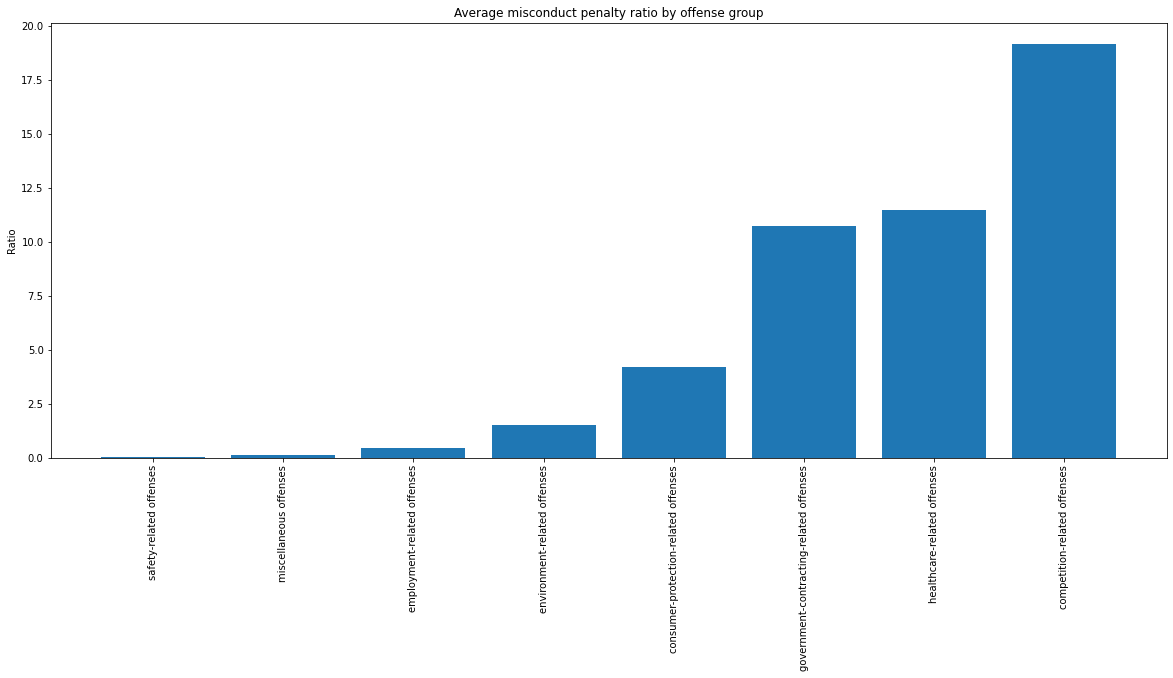

,Avg. Penalty Ratio
offense_group,
safety-related offenses,0.063928
miscellaneous offenses,0.113889
employment-related offenses,0.462663
environment-related offenses,1.508273
consumer-protection-related offenses,4.191272
government-contracting-related offenses,10.726495
healthcare-related offenses,11.484819
competition-related offenses,19.186748


In [ ]:
P1F3 = desc_stat_AvgRatio(NFF_SPX, 'offense_group', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by offense group', 'Ratio')
P1F3

In [ ]:
temp = pd.merge(P1F1*100, P1F2*100, left_index=True, right_index=True)
T1PanelF = pd.merge(temp, P1F3, left_index=True, right_index=True)
T1PanelF

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
offense_group,,,
miscellaneous offenses,0.080528,0.009171,0.113889
healthcare-related offenses,0.789177,9.063555,11.484819
competition-related offenses,0.950234,18.231891,19.186748
government-contracting-related offenses,1.111290,11.920248,10.726495
environment-related offenses,5.379288,8.113436,1.508273
consumer-protection-related offenses,9.615075,40.299390,4.191272
employment-related offenses,17.845064,8.256248,0.462663
safety-related offenses,64.229344,4.106060,0.063928


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelF.xlsx')
# write dataframe to excel
T1PanelF.to_excel(writer)
# save the excel
writer.save()

#### Panel E in thesis

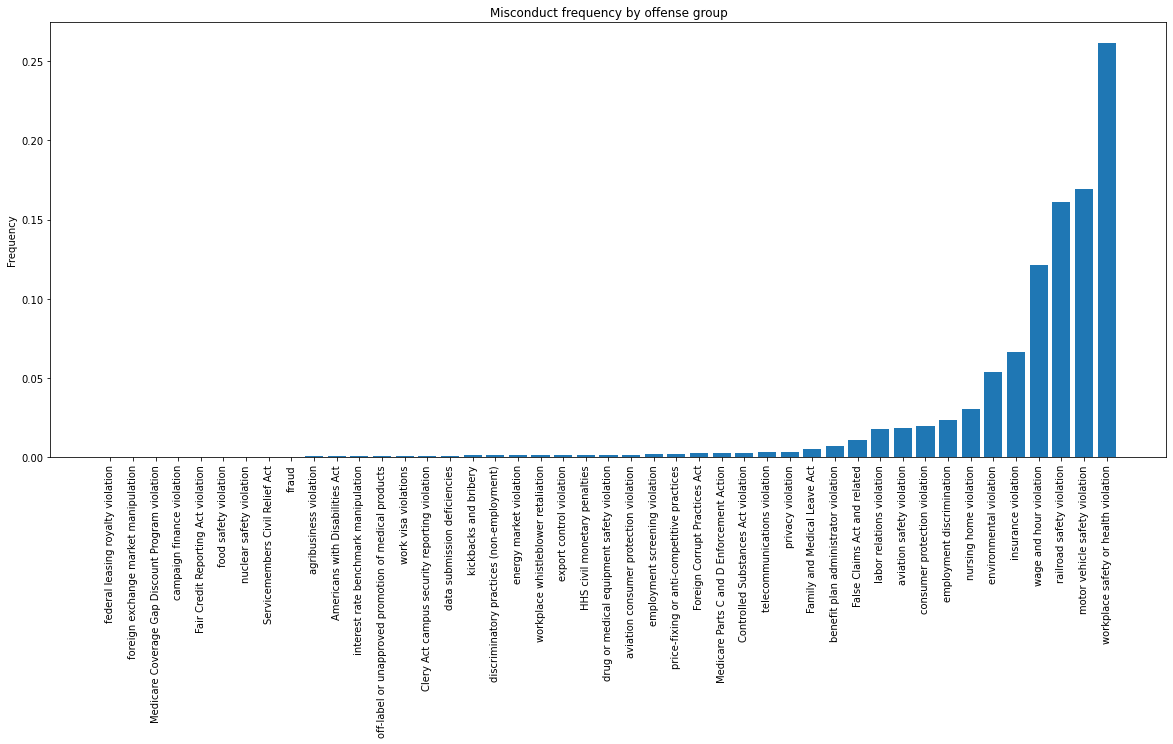

,Penalty frequency (%)
primary_offense,
federal leasing royalty violation,0.000161
foreign exchange market manipulation,0.000161
Medicare Coverage Gap Discount Program violation,0.000322
campaign finance violation,0.000322
Fair Credit Reporting Act violation,0.000322
food safety violation,0.000322
nuclear safety violation,0.000322
Servicemembers Civil Relief Act,0.000322
fraud,0.000322


In [ ]:
P1F1 = desc_stat_count(NFF_SPX, 'primary_offense', 'Penalty frequency (%)', 'Misconduct frequency by offense group', 'Frequency')
P1F1

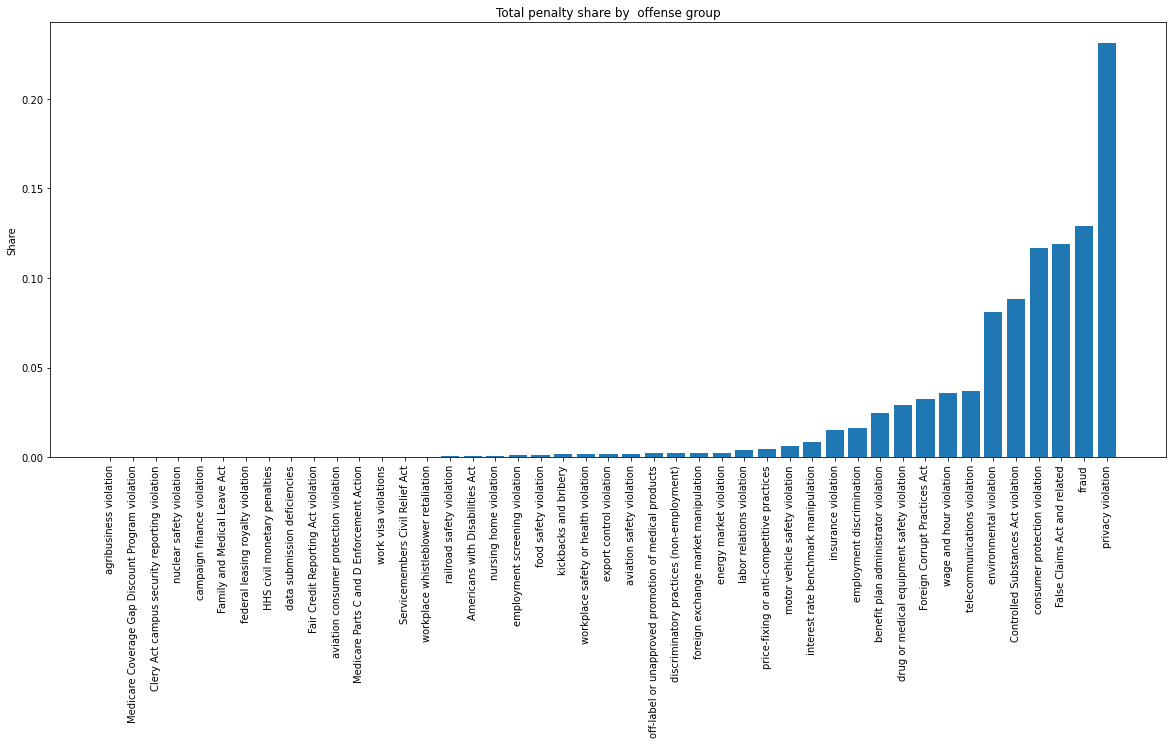

,Tatal Penalty Share (%)
primary_offense,
agribusiness violation,8.724427e-07
Medicare Coverage Gap Discount Program violation,5.371523e-06
Clery Act campus security reporting violation,6.745471e-06
nuclear safety violation,1.110768e-05
campaign finance violation,1.936397e-05
Family and Medical Leave Act,2.840818e-05
federal leasing royalty violation,3.787678e-05
HHS civil monetary penalties,6.933238e-05
data submission deficiencies,7.234890e-05


In [ ]:
P1F2 = desc_stat_TotPenal(NFF_SPX, 'primary_offense', 'Tatal Penalty Share (%)', 'Total penalty share by  offense group', 'Share')
P1F2

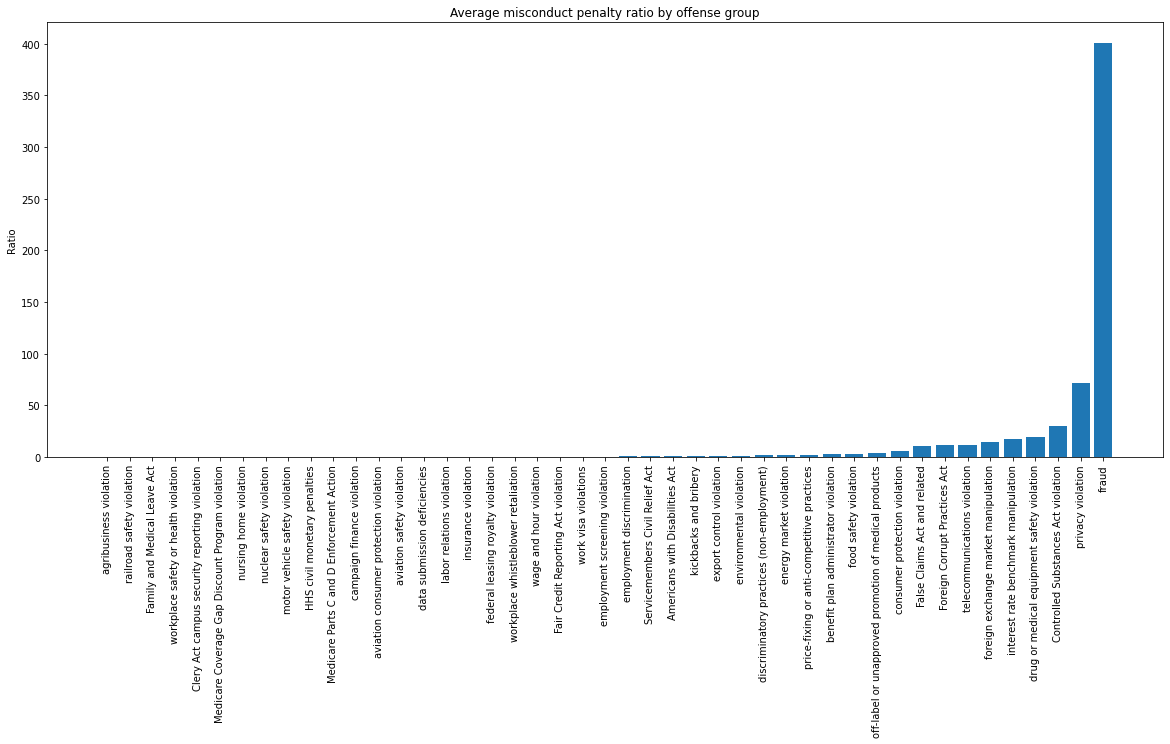

,Avg. Penalty Ratio
primary_offense,
agribusiness violation,0.001806
railroad safety violation,0.002376
Family and Medical Leave Act,0.005690
workplace safety or health violation,0.006168
Clery Act campus security reporting violation,0.013961
Medicare Coverage Gap Discount Program violation,0.016676
nursing home violation,0.022342
nuclear safety violation,0.034484
motor vehicle safety violation,0.038315


In [ ]:
P1F3 = desc_stat_AvgRatio(NFF_SPX, 'primary_offense', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by offense group', 'Ratio')
P1F3

In [ ]:
temp = pd.merge(P1F1*100, P1F2*100, left_index=True, right_index=True)
T1PanelF = pd.merge(temp, P1F3, left_index=True, right_index=True)
T1PanelF

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
primary_offense,,,
federal leasing royalty violation,0.016106,0.003788,0.235177
foreign exchange market manipulation,0.016106,0.233006,14.467344
Medicare Coverage Gap Discount Program violation,0.032211,0.000537,0.016676
campaign finance violation,0.032211,0.001936,0.060115
Fair Credit Reporting Act violation,0.032211,0.011065,0.343517
food safety violation,0.032211,0.110651,3.435169
nuclear safety violation,0.032211,0.001111,0.034484
Servicemembers Civil Relief Act,0.032211,0.026841,0.833293
fraud,0.032211,12.904917,400.633134


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelE_thesis.xlsx')
# write dataframe to excel
T1PanelF.to_excel(writer)
# save the excel
writer.save()

#### Panel F thesis

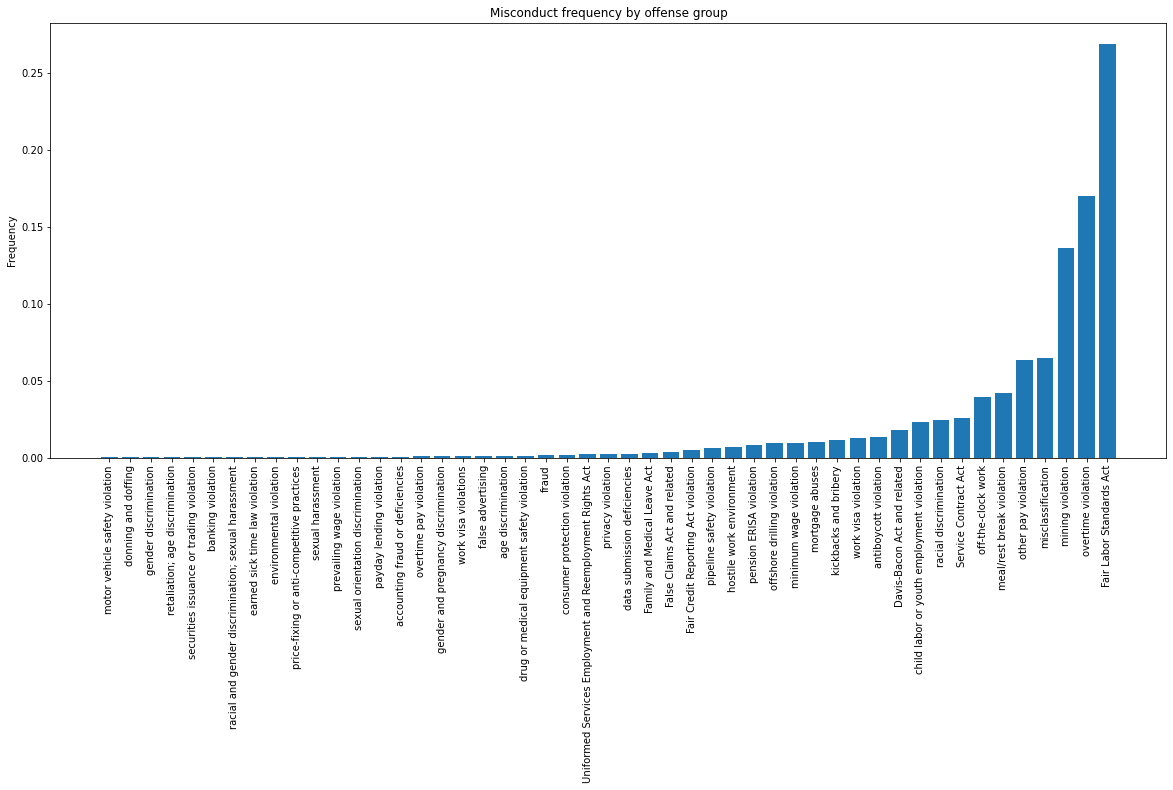

,Penalty frequency (%)
secondary_offense,
motor vehicle safety violation,0.000433
donning and doffing,0.000433
gender discrimination,0.000433
retaliation; age discrimination,0.000433
securities issuance or trading violation,0.000433
banking violation,0.000433
racial and gender discrimination; sexual harassment,0.000433
earned sick time law violation,0.000433
environmental violation,0.000433


In [ ]:
P1F1 = desc_stat_count(NFF_SPX, 'secondary_offense', 'Penalty frequency (%)', 'Misconduct frequency by offense group', 'Frequency')
P1F1

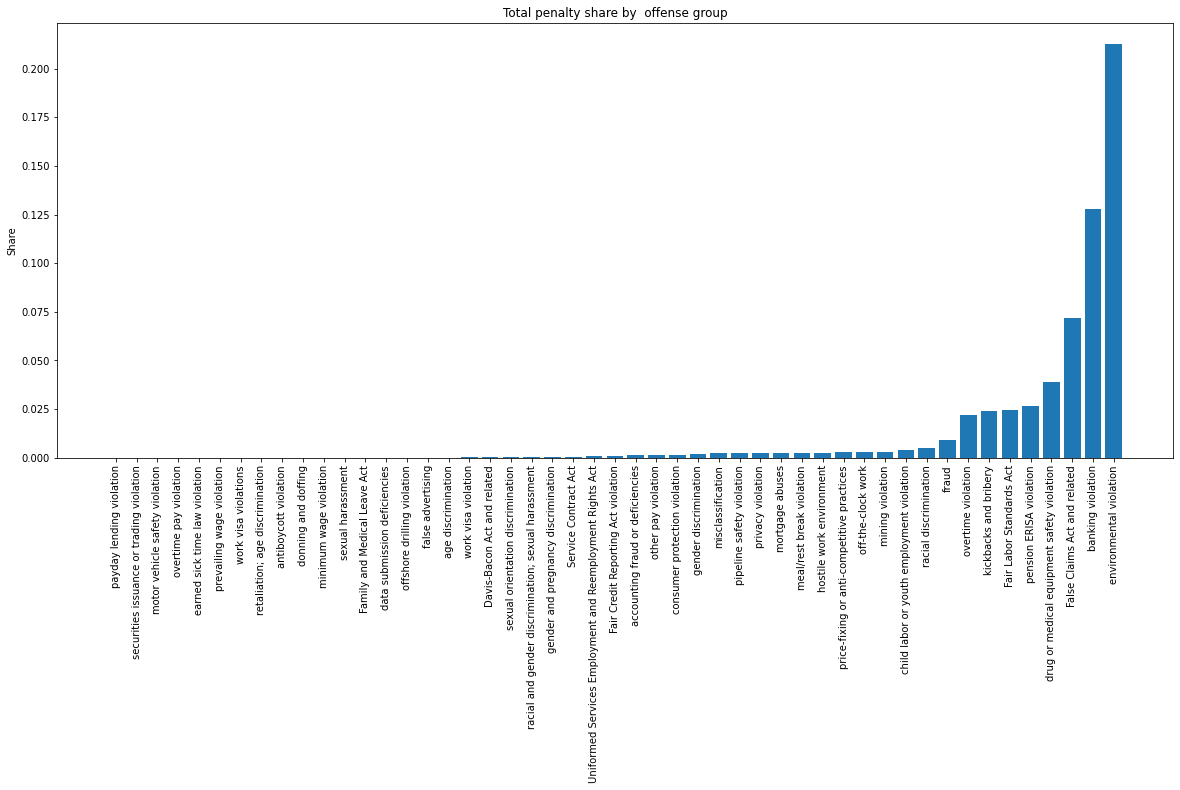

,Tatal Penalty Share (%)
secondary_offense,
payday lending violation,2.649247e-07
securities issuance or trading violation,3.404654e-07
motor vehicle safety violation,1.073402e-06
overtime pay violation,1.133920e-06
earned sick time law violation,3.830236e-06
prevailing wage violation,6.085820e-06
work visa violations,7.548757e-06
retaliation; age discrimination,8.511636e-06
antiboycott violation,1.581951e-05


In [ ]:
P1F2 = desc_stat_TotPenal(NFF_SPX, 'secondary_offense', 'Tatal Penalty Share (%)', 'Total penalty share by  offense group', 'Share')
P1F2

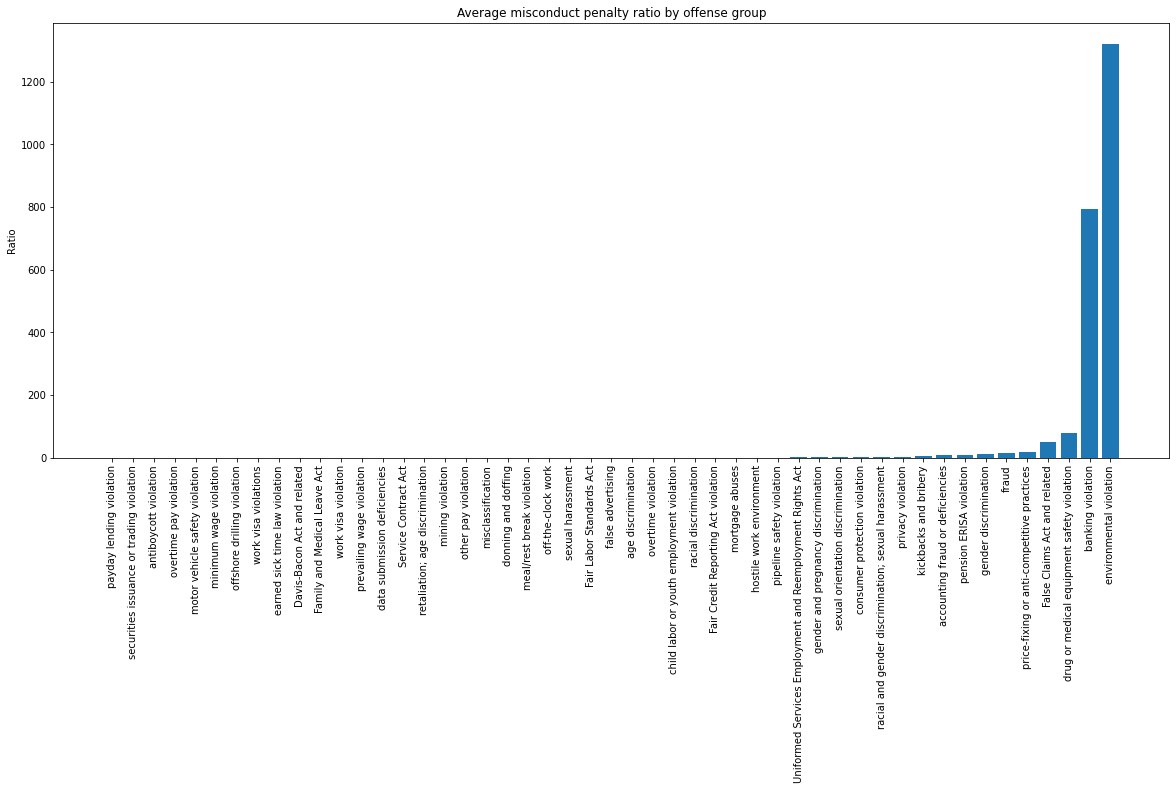

,Avg. Penalty Ratio
secondary_offense,
payday lending violation,0.001645
securities issuance or trading violation,0.002114
antiboycott violation,0.003168
overtime pay violation,0.003520
motor vehicle safety violation,0.006665
minimum wage violation,0.007554
offshore drilling violation,0.022282
work visa violations,0.023435
earned sick time law violation,0.023782


In [ ]:
P1F3 = desc_stat_AvgRatio(NFF_SPX, 'secondary_offense', 'Avg. Penalty Ratio', 'Average misconduct penalty ratio by offense group', 'Ratio')
P1F3

In [ ]:
temp = pd.merge(P1F1*100, P1F2*100, left_index=True, right_index=True)
T1PanelF = pd.merge(temp, P1F3, left_index=True, right_index=True)
T1PanelF

,Penalty frequency (%),Tatal Penalty Share (%),Avg. Penalty Ratio
secondary_offense,,,
motor vehicle safety violation,0.043346,0.000107,0.006665
donning and doffing,0.043346,0.001809,0.112304
gender discrimination,0.043346,0.191512,11.890968
retaliation; age discrimination,0.043346,0.000851,0.052849
securities issuance or trading violation,0.043346,0.000034,0.002114
banking violation,0.043346,12.767454,792.731195
racial and gender discrimination; sexual harassment,0.043346,0.042558,2.642437
earned sick time law violation,0.043346,0.000383,0.023782
environmental violation,0.043346,21.279089,1321.218659


In [ ]:
# create excel writer object
writer = pd.ExcelWriter('Table1_PanelF_thesis.xlsx')
# write dataframe to excel
T1PanelF.to_excel(writer)
# save the excel
writer.save()

#### ***Rnadom sample***

In [ ]:
desired_agencies = ['OSHA', 'WHD', 'EPA', 'NLRB']

In [ ]:
#Sampling with desired agencies
df1 = NFF_SPX.loc[NFF_SPX.agency_code1.isin(['OSHA'])]
Rsample1 = df1.sample(25)
df2 = NFF_SPX.loc[NFF_SPX.agency_code1.isin(['WHD'])]
Rsample2 = df2.sample(25)
df3 = NFF_SPX.loc[NFF_SPX.agency_code1.isin(['EPA'])]
Rsample3 = df3.sample(25)
df4 = NFF_SPX.loc[NFF_SPX.agency_code1.isin(['NLRB'])]
Rsample4 = df4.sample(25)
Rsample = Rsample1.append(Rsample2)
Rsample = Rsample.append(Rsample3)
Rsample = Rsample.append(Rsample4)
# create excel writer object
writer = pd.ExcelWriter('Random_sample_OWEN.xlsx')
# write dataframe to excel
Rsample[['stock_ticker', 'date', 'agency_code1']].to_excel(writer)
# save the excel
writer.save()


In [ ]:
writer = pd.ExcelWriter('Random_sample_OWEN_fullDetail.xlsx')
# write dataframe to excel
Rsample.to_excel(writer)
# save the excel
writer.save()

In [ ]:
Rsample[Rsample.stock_ticker == 'VZ']

,agency,agency_code,pen_year,company,city,county,street_address,state,zip,description,naics,info_source,notes,unique_id,parent_name,load_day,penalty,sub_penalty,penalty_adjusted,orig_id,civil_criminal,npa_dpa,offense_group,primary_offense,secondary_offense,naics_tr,case_id,facility_name,penalty_date,govt_level,case_category,court,litigation_case_title,lawsuit_resolution,pacer_link,stock_ticker,pen_total,num_recs,name_all,rank,ownership,russell3000,hq_country,hq_state,industry,major_industry,viol_parent_url,sub_parent_url,csw_link,date,constituents,Is.SPX,agency_code1
45812,Labor Department Wage and Hour Division,WHD,2018,Velocity Capital Management,Dallas,NaN,2120 Greenville Ave,TX,75206,Settlement of the terms of a consent decree en...,447110.0,"August 24, 2018 download of a dataset posted b...",Date and year are the Findings End Date in the...,2098994,NaN,20180907,5723,0,5723,NaN,civil,NaN,employment-related offenses,wage and hour violation,overtime violation,447110: Gasoline Stations with Convenience Stores,1844569,NaN,20180305,federal,agency action,NaN,NaN,NaN,NaN,VZ,2.492797e+09,158.0,CELLCO PARTNERSHIP D / B / A,28.0,publicly traded,yes,USA,New York,telecommunications,telecommunications,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2018-03-05,"[[MMM, ABT, ABBV, ACN, ATVI, ADBE, AMD, AAP, A...",True,WHD
45840,Labor Department Wage and Hour Division,WHD,2018,"Jjang Style, Inc.",Los Angeles,NaN,657 E. 61st Street,CA,90001,Settlement of the terms of a consent decree en...,31523.0,"August 24, 2018 download of a dataset posted b...",Date and year are the Findings End Date in the...,2099024,NaN,20180907,46613,0,46613,NaN,civil,NaN,employment-related offenses,wage and hour violation,overtime violation,31523: Women's and Girls' Cut and Sew Apparel ...,1833070,NaN,20180220,federal,agency action,NaN,NaN,NaN,NaN,VZ,2.492797e+09,158.0,VERIZON WIRELESS,28.0,publicly traded,yes,USA,New York,telecommunications,telecommunications,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2018-02-20,"[[MMM, ABT, ABBV, ACN, ATVI, ADBE, AMD, AAP, A...",True,WHD
45841,Labor Department Wage and Hour Division,WHD,2018,Temperature Technology Inc.,Rapid City,NaN,2809 Plant St.,SD,57702,Settlement of the terms of a consent decree en...,238990.0,"August 24, 2018 download of a dataset posted b...",Date and year are the Findings End Date in the...,2099025,NaN,20180907,6620,0,6620,NaN,civil,NaN,employment-related offenses,wage and hour violation,overtime violation,238990: All Other Specialty Trade Contractors,1844860,NaN,20180220,federal,agency action,NaN,NaN,NaN,NaN,VZ,2.492797e+09,158.0,"Verizon Wireless Services, LLC",28.0,publicly traded,yes,USA,New York,telecommunications,telecommunications,https://violationtracker.goodjobsfirst.org/par...,https://subsidytracker.goodjobsfirst.org/paren...,NaN,2018-02-20,"[[MMM, ABT, ABBV, ACN, ATVI, ADBE, AMD, AAP, A...",True,WHD


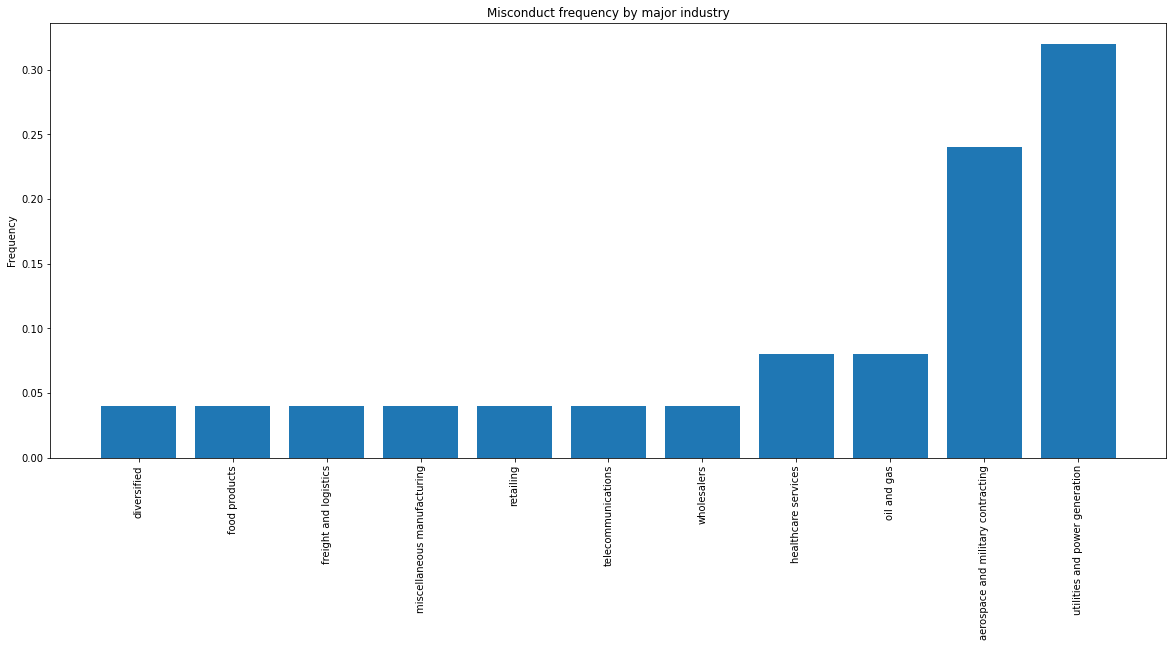

,Penalty frequency (%)
major_industry,
diversified,0.04
food products,0.04
freight and logistics,0.04
miscellaneous manufacturing,0.04
retailing,0.04
telecommunications,0.04
wholesalers,0.04
healthcare services,0.08
oil and gas,0.08


In [ ]:
Sample = desc_stat_count(Rsample.loc[Rsample.agency_code1.isin(['NLRB'])], 'major_industry', 'Penalty frequency (%)', 'Misconduct frequency by major industry', 'Frequency')
Sample

In [ ]:
#Sampling with desired agencies
real_90percent_agencies = ['OSHA', 'FRA', 'FMCSA', 'WHD', 'AG', 'EPA', 'MSHA', 'INS', 'CMS', 'SEC', 'MHC', 'NLRB', 'EEOC']
df2 = NFF_SPX.loc[NFF_SPX.agency_code1.isin(real_90percent_agencies)]
Rsample = NFF_SPX.sample(100)
# create excel writer object
writer = pd.ExcelWriter('Random_sample_90percent.xlsx')
# write dataframe to excel
Rsample[['stock_ticker', 'date']].to_excel(writer)
# save the excel
writer.save()

In [ ]:
NFF_SPX.agency_code1.value_counts()

OSHA             1440
FMCSA            1072
FRA              1037
WHD               605
EPA               271
INS               227
CMS               222
AG                214
MSHA              204
MHC               123
FAA               121
NLRB              110
EEOC               74
OFCCP              57
USAO               53
FIN                35
EBSA               30
DBO                27
FCC                23
DFS                23
BSEE               22
MULTI              21
DOJ_CIVIL          20
SEC                14
FTC                14
PHMSA              11
ACPD               11
HHSOIG              9
CFPB                9
DLI                 9
FERC                7
CFTC                6
BIS                 6
DOJ_CRIMINAL        6
HHSOCR              5
DOJ_RIGHTS          4
DEA                 4
HUD                 4
ED                  3
OFR                 3
DOJ_ANTITRUST       3
NRC                 2
DDTC                2
DBI                 2
AMS                 2
LCO       

In [ ]:
writer = pd.ExcelWriter('Sample_All.xlsx')
# write dataframe to excel
NFF_SPX.to_excel(writer)
# save the excel
writer.save()